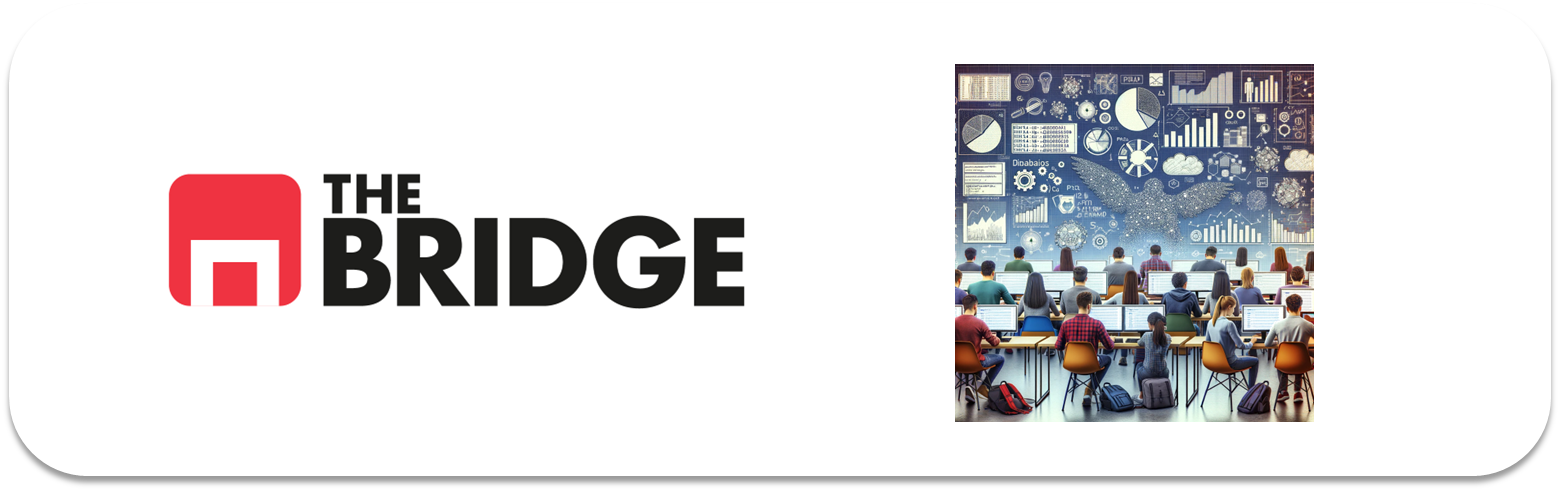

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [894]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import bootcampviztools

from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from pprint import pprint


### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [895]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [896]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


*Para situaciones como la de "deck", que es una categórica con muchos nulos: se le puede asignar la clase "UNK", que será una clase nueva de nuestra variable. Si nos pasa con una numérica quizá podríamos convertirla en una categórica binaria "KNOWN", "UNKNOWN".*

In [897]:
df_titanic.drop(columns=["embarked", "class", "deck", "alive"], inplace=True)
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,True


<Axes: xlabel='survived', ylabel='count'>

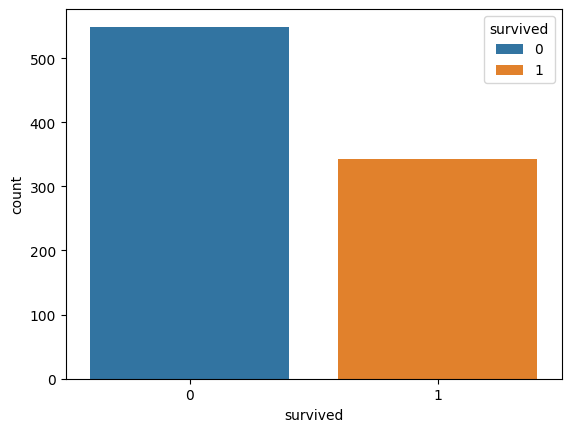

In [898]:
sns.countplot(df_titanic, x = "survived", hue = "survived")


*Nuestra variable target está un poco desbalanceada, pero no en exceso, por lo que no debería dar demasiado problema.*

In [899]:
df_titanic.loc[df_titanic.embark_town.isna(), "embark_town"] =  df_titanic.embark_town.mode()[0]

train, test = train_test_split(df_titanic, test_size= 0.2, stratify= df_titanic["embark_town"], random_state= 42)


In [900]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 838 to 571
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          561 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   who          712 non-null    object 
 8   adult_male   712 non-null    bool   
 9   embark_town  712 non-null    object 
 10  alone        712 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 57.0+ KB


In [901]:
es_nino = train["who"] == "child"
es_hombre = train["who"] == "man"
es_mujer = train["who"] == "woman"
edad_nulo = train["age"].isna()

mediana_hombre = round(train.loc[es_hombre, "age"].median(), 0)
mediana_mujer = round(train.loc[es_mujer, "age"].median(), 0)
mediana_nino = round(train.loc[es_nino, "age"].median(), 0)

train.loc[es_hombre & edad_nulo, "age"] = mediana_hombre
train.loc[es_mujer & edad_nulo, "age"] = mediana_mujer
train.loc[es_nino & edad_nulo, "age"] = mediana_nino

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 838 to 571
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   who          712 non-null    object 
 8   adult_male   712 non-null    bool   
 9   embark_town  712 non-null    object 
 10  alone        712 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 57.0+ KB


In [902]:
es_nino = test["who"] == "child"
es_hombre = test["who"] == "man"
es_mujer = test["who"] == "woman"
edad_nulo = test["age"].isna()

test.loc[es_hombre & edad_nulo, "age"] = mediana_hombre
test.loc[es_mujer & edad_nulo, "age"] = mediana_mujer
test.loc[es_nino & edad_nulo, "age"] = mediana_nino

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 395 to 9
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     179 non-null    int64  
 1   pclass       179 non-null    int64  
 2   sex          179 non-null    object 
 3   age          179 non-null    float64
 4   sibsp        179 non-null    int64  
 5   parch        179 non-null    int64  
 6   fare         179 non-null    float64
 7   who          179 non-null    object 
 8   adult_male   179 non-null    bool   
 9   embark_town  179 non-null    object 
 10  alone        179 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 14.3+ KB


In [903]:
test.age.value_counts()

age
31.00    22
30.00    10
22.00     9
24.00     9
25.00     8
33.00     6
16.00     6
19.00     5
18.00     5
27.00     5
32.00     4
39.00     4
36.00     4
35.00     4
28.00     4
29.00     4
50.00     3
23.00     3
51.00     3
34.00     3
15.00     3
9.00      3
26.00     3
42.00     3
21.00     3
58.00     2
5.00      2
41.00     2
7.00      2
11.00     2
38.00     2
4.00      2
40.00     2
43.00     2
0.42      1
0.92      1
62.00     1
8.00      1
48.00     1
61.00     1
30.50     1
17.00     1
3.00      1
0.67      1
14.50     1
65.00     1
54.00     1
45.00     1
52.00     1
23.50     1
20.00     1
49.00     1
1.00      1
13.00     1
28.50     1
64.00     1
45.50     1
37.00     1
14.00     1
Name: count, dtype: int64

In [904]:
train.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.321097,-0.060492,-0.019424,0.075400,0.263719,-0.549396,-0.206772
pclass,-0.321097,1.000000,-0.345377,0.078641,-0.000447,-0.533078,0.103539,0.136922
age,-0.060492,-0.345377,1.000000,-0.237383,-0.190257,0.090760,0.264652,0.179007
sibsp,-0.019424,0.078641,-0.237383,1.000000,0.458566,0.162751,-0.265474,-0.593969
parch,0.075400,-0.000447,-0.190257,0.458566,1.000000,0.233931,-0.332198,-0.604069
fare,0.263719,-0.533078,0.090760,0.162751,0.233931,1.000000,-0.189753,-0.260775
adult_male,-0.549396,0.103539,0.264652,-0.265474,-0.332198,-0.189753,1.000000,0.420266
alone,-0.206772,0.136922,0.179007,-0.593969,-0.604069,-0.260775,0.420266,1.000000


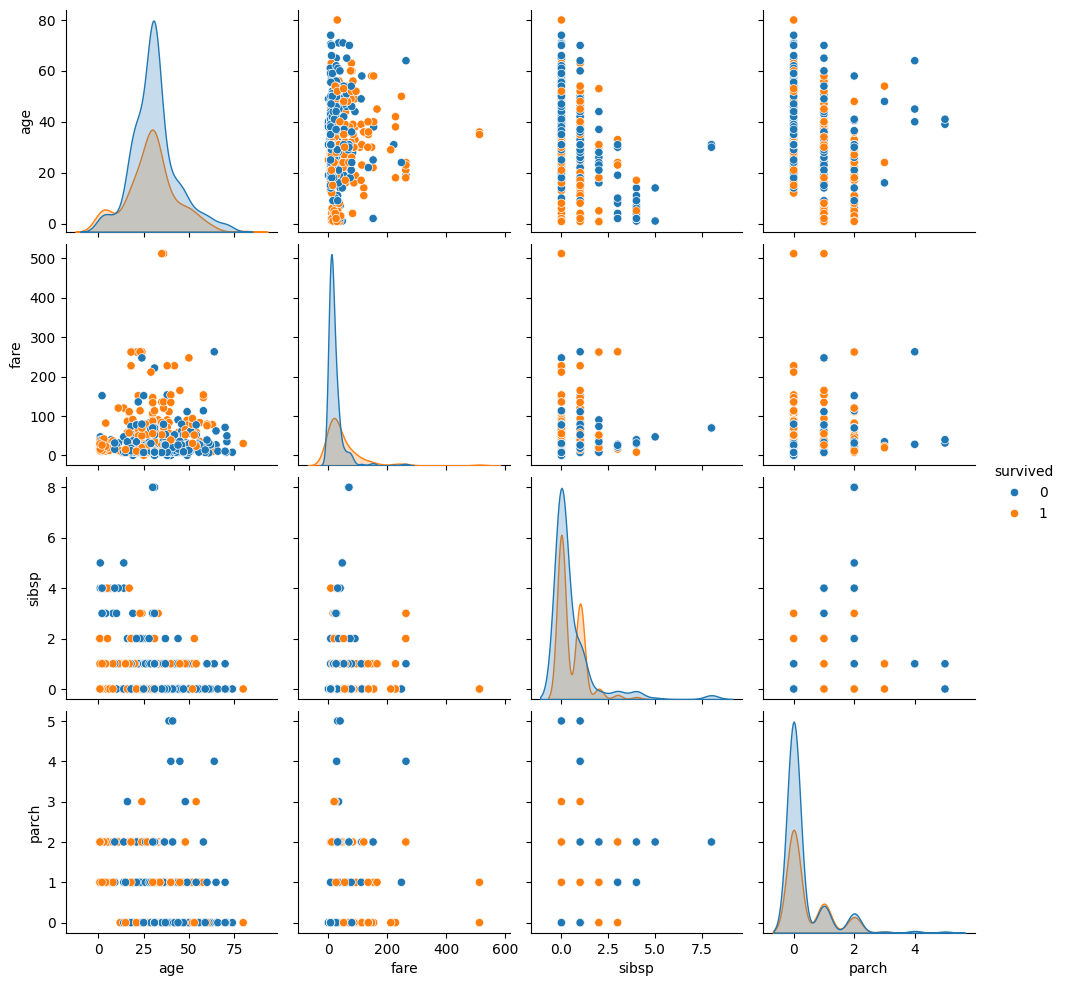

In [905]:
sns.pairplot(train[["age", "fare", "sibsp", "parch", "survived"]], hue= "survived")

*Como tengo pocas numéricas y en ambas se observa al menos algo de correlación, de momento me quedo las dos, si tengo tiempo probaré a quitar "age" que parece menos relacionada.*

In [906]:
f_num = ["fare", "age"]

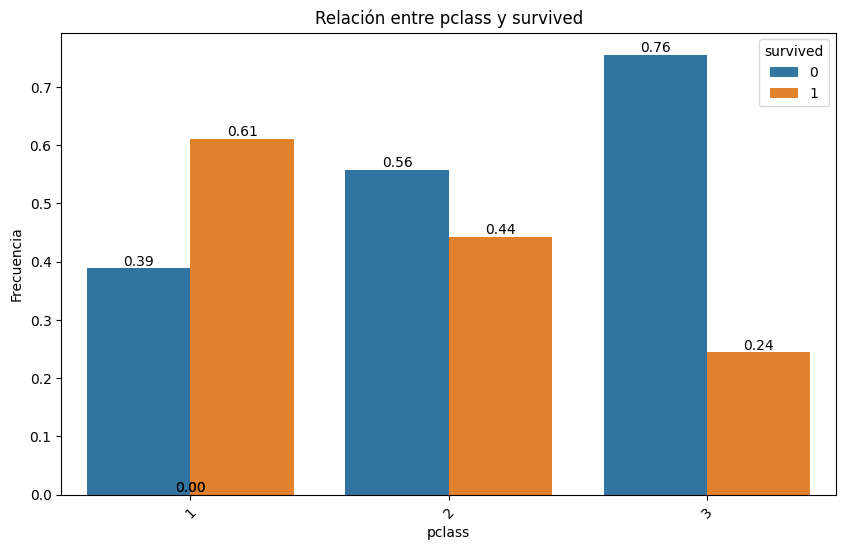

In [907]:
bootcampviztools.plot_categorical_relationship_fin(train, "pclass", "survived", relative_freq=True, show_values=True)

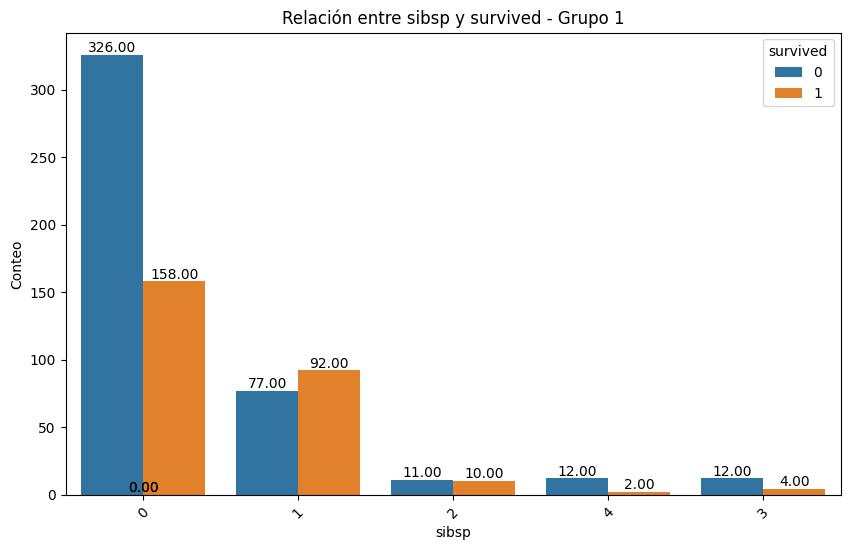

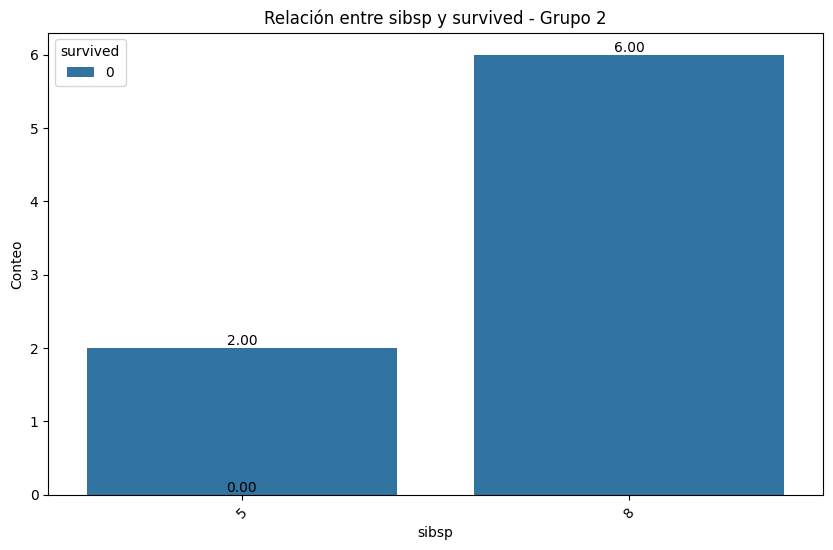

In [908]:
bootcampviztools.plot_categorical_relationship_fin(train, "sibsp", "survived", show_values=True)

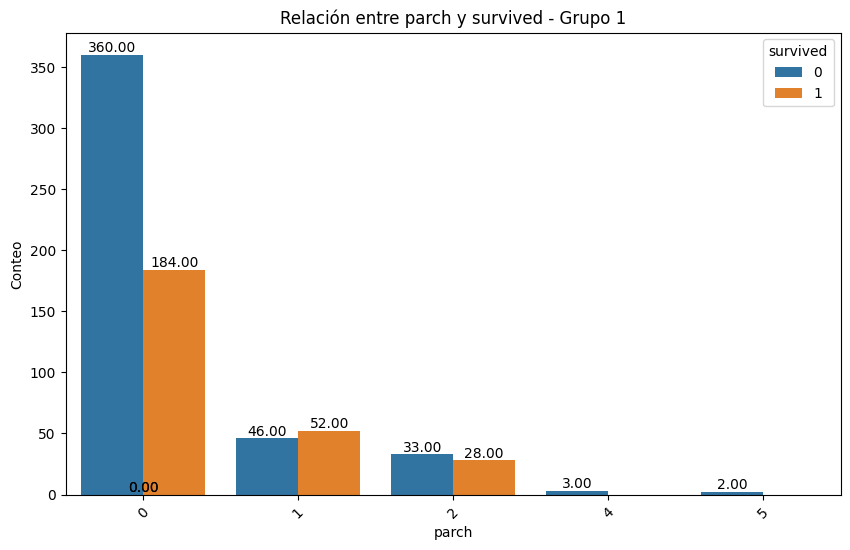

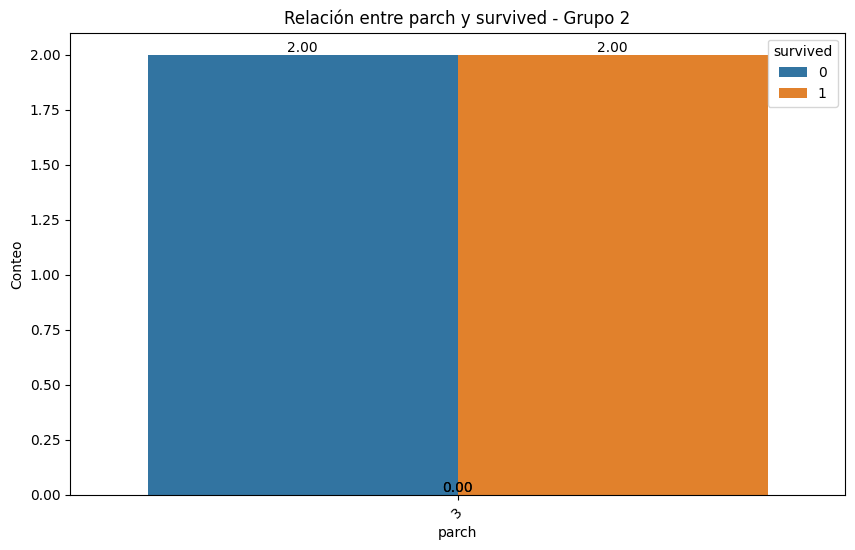

In [909]:
bootcampviztools.plot_categorical_relationship_fin(train, "parch", "survived", show_values=True)

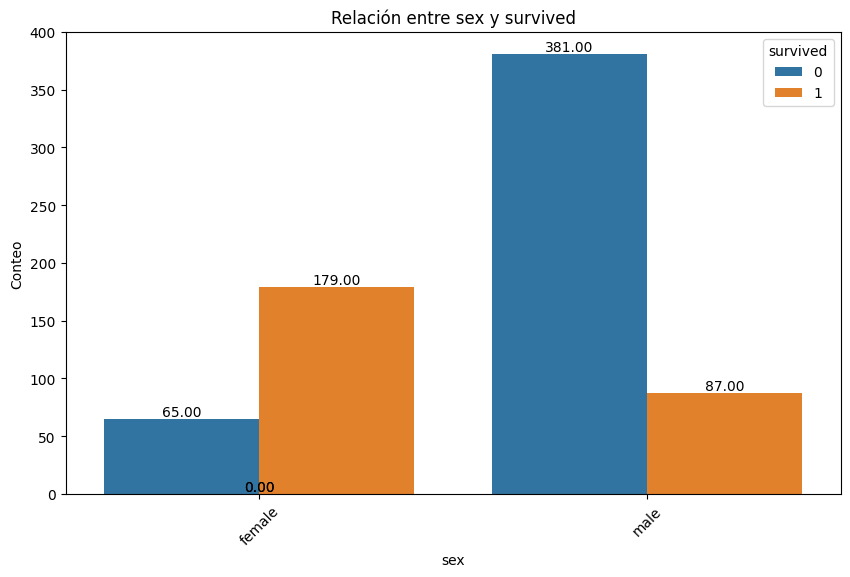

In [910]:
bootcampviztools.plot_categorical_relationship_fin(train, "sex", "survived", show_values=True)

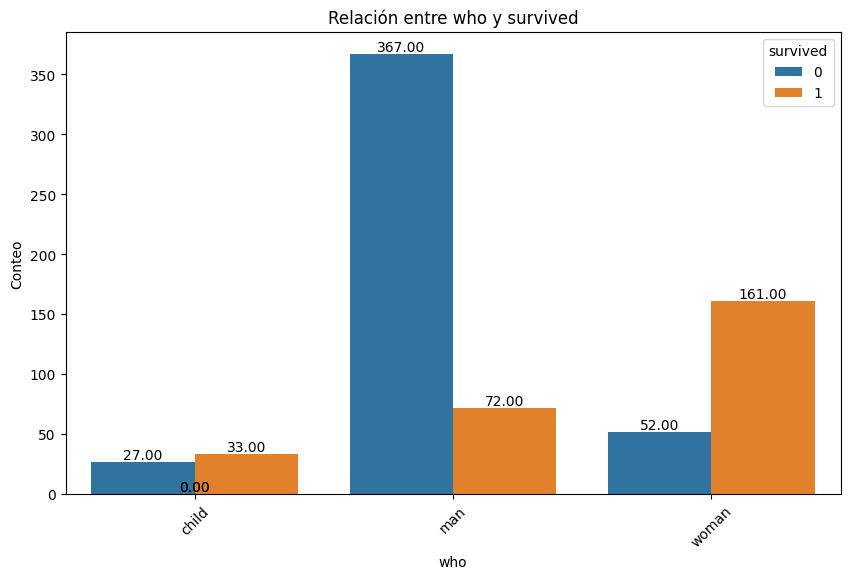

In [911]:
bootcampviztools.plot_categorical_relationship_fin(train, "who", "survived", show_values=True)

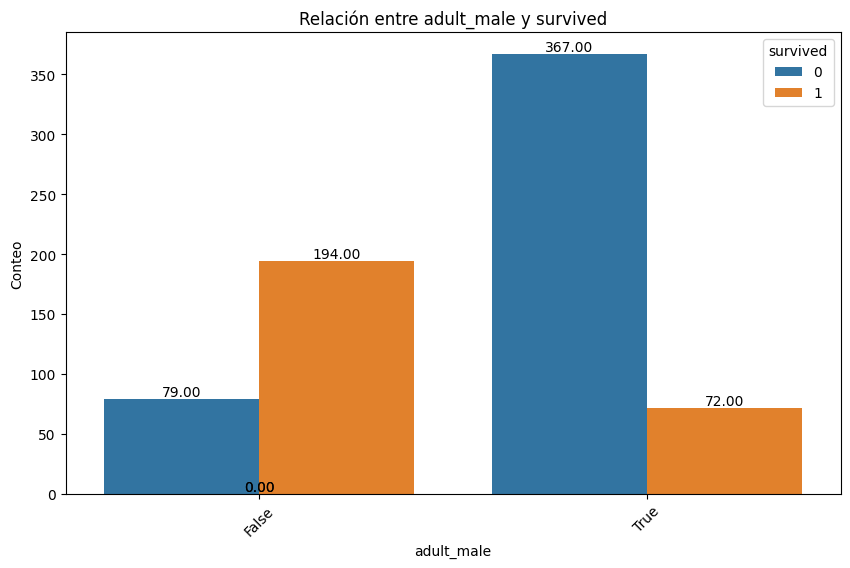

In [912]:
bootcampviztools.plot_categorical_relationship_fin(train, "adult_male", "survived", show_values=True)

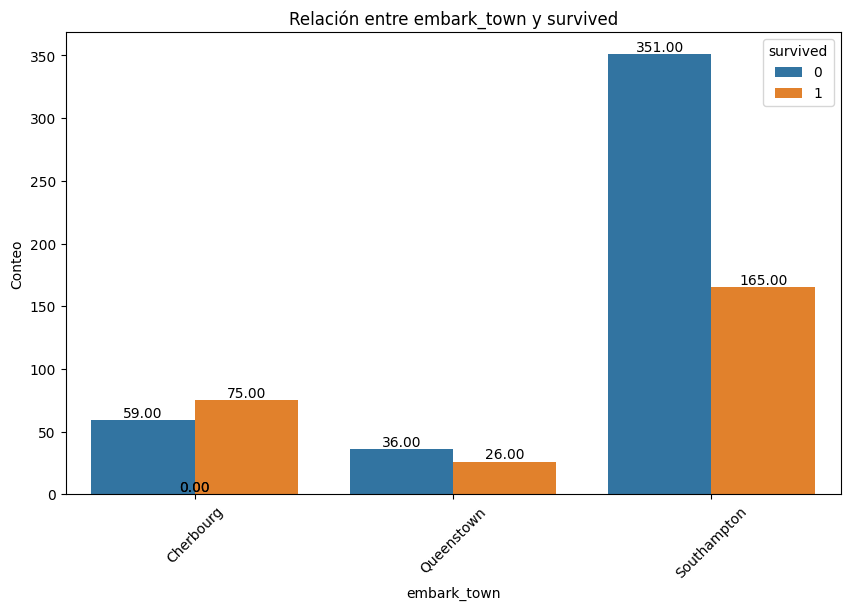

In [913]:
bootcampviztools.plot_categorical_relationship_fin(train, "embark_town", "survived", show_values=True)

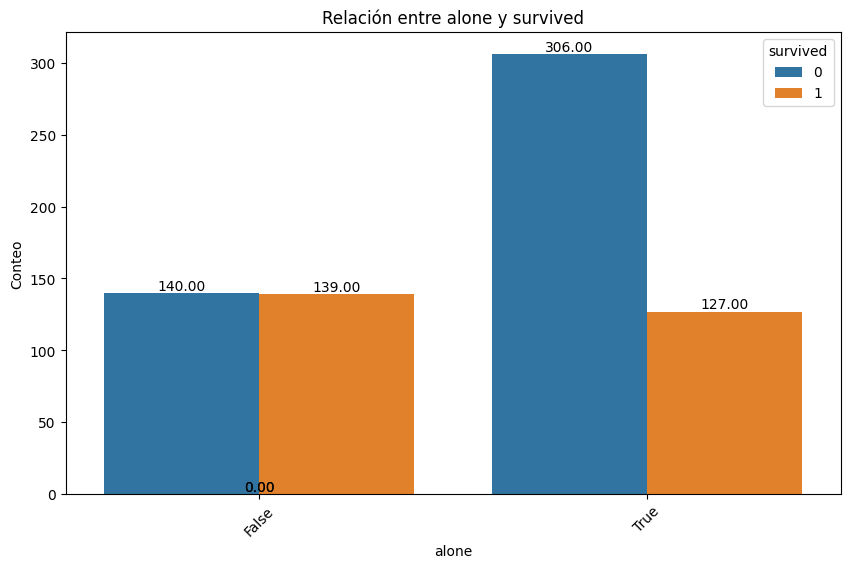

In [914]:
bootcampviztools.plot_categorical_relationship_fin(train, "alone", "survived", show_values=True)

In [915]:
from scipy.stats import chi2_contingency
for col in train.drop(columns=["age", "fare", "survived"]):
    tabla_contingecia = pd.crosstab(train["survived"], train[col])
    chi2, p_value, dof, expected = chi2_contingency(tabla_contingecia)
    print(f"P-Value para descartar que '{col}' y 'survive' no están relacionadas: {p_value}")

P-Value para descartar que 'pclass' y 'survive' no están relacionadas: 1.08811242411783e-16
P-Value para descartar que 'sex' y 'survive' no están relacionadas: 4.069774816014647e-46
P-Value para descartar que 'sibsp' y 'survive' no están relacionadas: 3.287911675473301e-06
P-Value para descartar que 'parch' y 'survive' no están relacionadas: 0.0024974969023396445
P-Value para descartar que 'who' y 'survive' no están relacionadas: 3.1078986957052767e-49
P-Value para descartar que 'adult_male' y 'survive' no están relacionadas: 3.76197457979106e-48
P-Value para descartar que 'embark_town' y 'survive' no están relacionadas: 1.5337936276875425e-06
P-Value para descartar que 'alone' y 'survive' no están relacionadas: 5.3879237397336957e-08


*En todas podemos descartar la hipótesis nula (que no están relacionadas), por lo que a priori podemos afirmar con cierta confianza estadística que todas están relacionadas con la variable target, vamos a ver ahora entre ellas.*

In [916]:
dict_chi2 = {}
for col in train.drop(columns=["age", "fare", "survived"]):
    dict_chi2[col] = []
    for col2 in train.drop(columns=["age", "fare", "survived"]):
        tabla_contingecia = pd.crosstab(train[col], train[col2])
        chi2, p_value, dof, expected = chi2_contingency(tabla_contingecia)
        dict_chi2[col].append(p_value)

tabla_chi2 = pd.DataFrame(dict_chi2, index = train.drop(columns=["age", "fare", "survived"]).columns.to_list())

In [917]:
tabla_chi2

,pclass,sex,sibsp,parch,who,adult_male,embark_town,alone
pclass,4.319350e-307,9.017604e-04,7.214211e-05,6.316902e-01,1.472300e-06,1.168067e-02,2.889233e-19,1.197059e-03
sex,9.017604e-04,6.762539e-156,5.143035e-08,5.994285e-09,6.841489e-141,5.655005e-131,2.934654e-05,1.180646e-17
sibsp,7.214211e-05,5.143035e-08,0.000000e+00,4.499024e-44,3.386919e-46,1.298934e-18,2.241188e-02,3.159165e-109
parch,6.316902e-01,5.994285e-09,4.499024e-44,0.000000e+00,2.956082e-41,5.845564e-22,7.437331e-02,1.338153e-71
who,1.472300e-06,6.841489e-141,3.386919e-46,2.956082e-41,4.319350e-307,2.461299e-155,1.829198e-04,5.683982e-35
adult_male,1.168067e-02,5.655005e-131,1.298934e-18,5.845564e-22,2.461299e-155,6.091127e-156,8.149138e-04,8.459124e-29
embark_town,2.889233e-19,2.934654e-05,2.241188e-02,7.437331e-02,1.829198e-04,8.149138e-04,4.319350e-307,6.156408e-04
alone,1.197059e-03,1.180646e-17,3.159165e-109,1.338153e-71,5.683982e-35,8.459124e-29,6.156408e-04,5.989768e-156


*Parece que todas están bastante relacionadas entre sí con bastante confianza estadística, así que voy a descartar algunas de las columnas que son muy similares. En el caso de "who", "sex" y "adult_male" voy a quedarme con who, porque diferencia entre mujeres y niños y además tiene el menor p-value en la prueba chi^2, aunque si tengo tiempo probaré las 3. En el caso de "alone", "sibsp" y "parch" de momento me voy a quedar con "alone" porque tiene un menor p-value en la prueba chi^2, aunque si tengo tiempo probaré con las otras dos juntas.* 

In [918]:
f_cat = train.drop(columns=["age", "fare", "survived", "sex", "adult_male", "sibsp", "parch"]).columns.to_list()
features = f_cat+f_num
target = "survived"

In [919]:
train = train.copy()[features + [target]]
test = test.copy()[features + [target]]

In [920]:
train[f_cat]

,pclass,who,embark_town,alone
838,3,man,Southampton,True
621,1,man,Southampton,False
282,3,man,Southampton,True
275,1,woman,Southampton,False
217,2,man,Southampton,False
...,...,...,...,...
594,2,man,Southampton,False
166,1,woman,Southampton,False
121,3,man,Southampton,True
785,3,man,Southampton,True


In [921]:
train.alone = train.alone.astype("int")


In [922]:
test.alone = test.alone.astype("int")

In [923]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 838 to 571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       712 non-null    int64  
 1   who          712 non-null    object 
 2   embark_town  712 non-null    object 
 3   alone        712 non-null    int64  
 4   fare         712 non-null    float64
 5   age          712 non-null    float64
 6   survived     712 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [924]:
train_2 = train.copy()

In [925]:
for col in train[f_cat]:
    if train[col].dtype == "object":
        train = pd.get_dummies(train, columns= [col], dtype= int)
        test = pd.get_dummies(test, columns= [col], dtype= int)

array([[<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

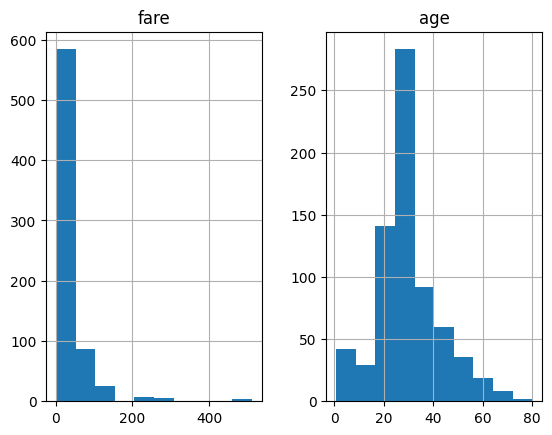

In [926]:
train[f_num].hist()

In [927]:
train_bck = train.copy()

In [928]:
feature_log = train.fare + 1
train.fare = np.log(feature_log)
feature_log = test.fare + 1
test.fare = np.log(feature_log)

In [929]:
scaler = StandardScaler()

for col in train[f_num]:
    scaler.fit(train[[col]])
    train[col] = scaler.transform(train[[col]])
    test[col] = scaler.transform(test[[col]])

In [930]:
X_train = train.drop(columns=["survived"])
y_train = train["survived"]
X_test = test.drop(columns=["survived"])
y_test = test["survived"]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(712, 10) (712,) (179, 10) (179,)


In [931]:
log_reg = LogisticRegression(max_iter = 10000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [932]:
pred_train = log_reg.predict(X_train)

In [933]:
log_reg.predict_proba(X_train)

array([[0.91051077, 0.08948923],
       [0.7152732 , 0.2847268 ],
       [0.89915781, 0.10084219],
       ...,
       [0.92253915, 0.07746085],
       [0.91498103, 0.08501897],
       [0.16261874, 0.83738126]], shape=(712, 2))

In [934]:
coeficientes = pd.DataFrame(log_reg.coef_.tolist(), index= ["coeficientes"], columns= log_reg.feature_names_in_).T
coeficientes.abs().sort_values(by="coeficientes", ascending=False)

,coeficientes
who_man,1.575134
who_woman,1.188703
pclass,0.950788
who_child,0.389351
embark_town_Southampton,0.381724
alone,0.312521
age,0.239874
embark_town_Cherbourg,0.233068
embark_town_Queenstown,0.151577
fare,0.092787


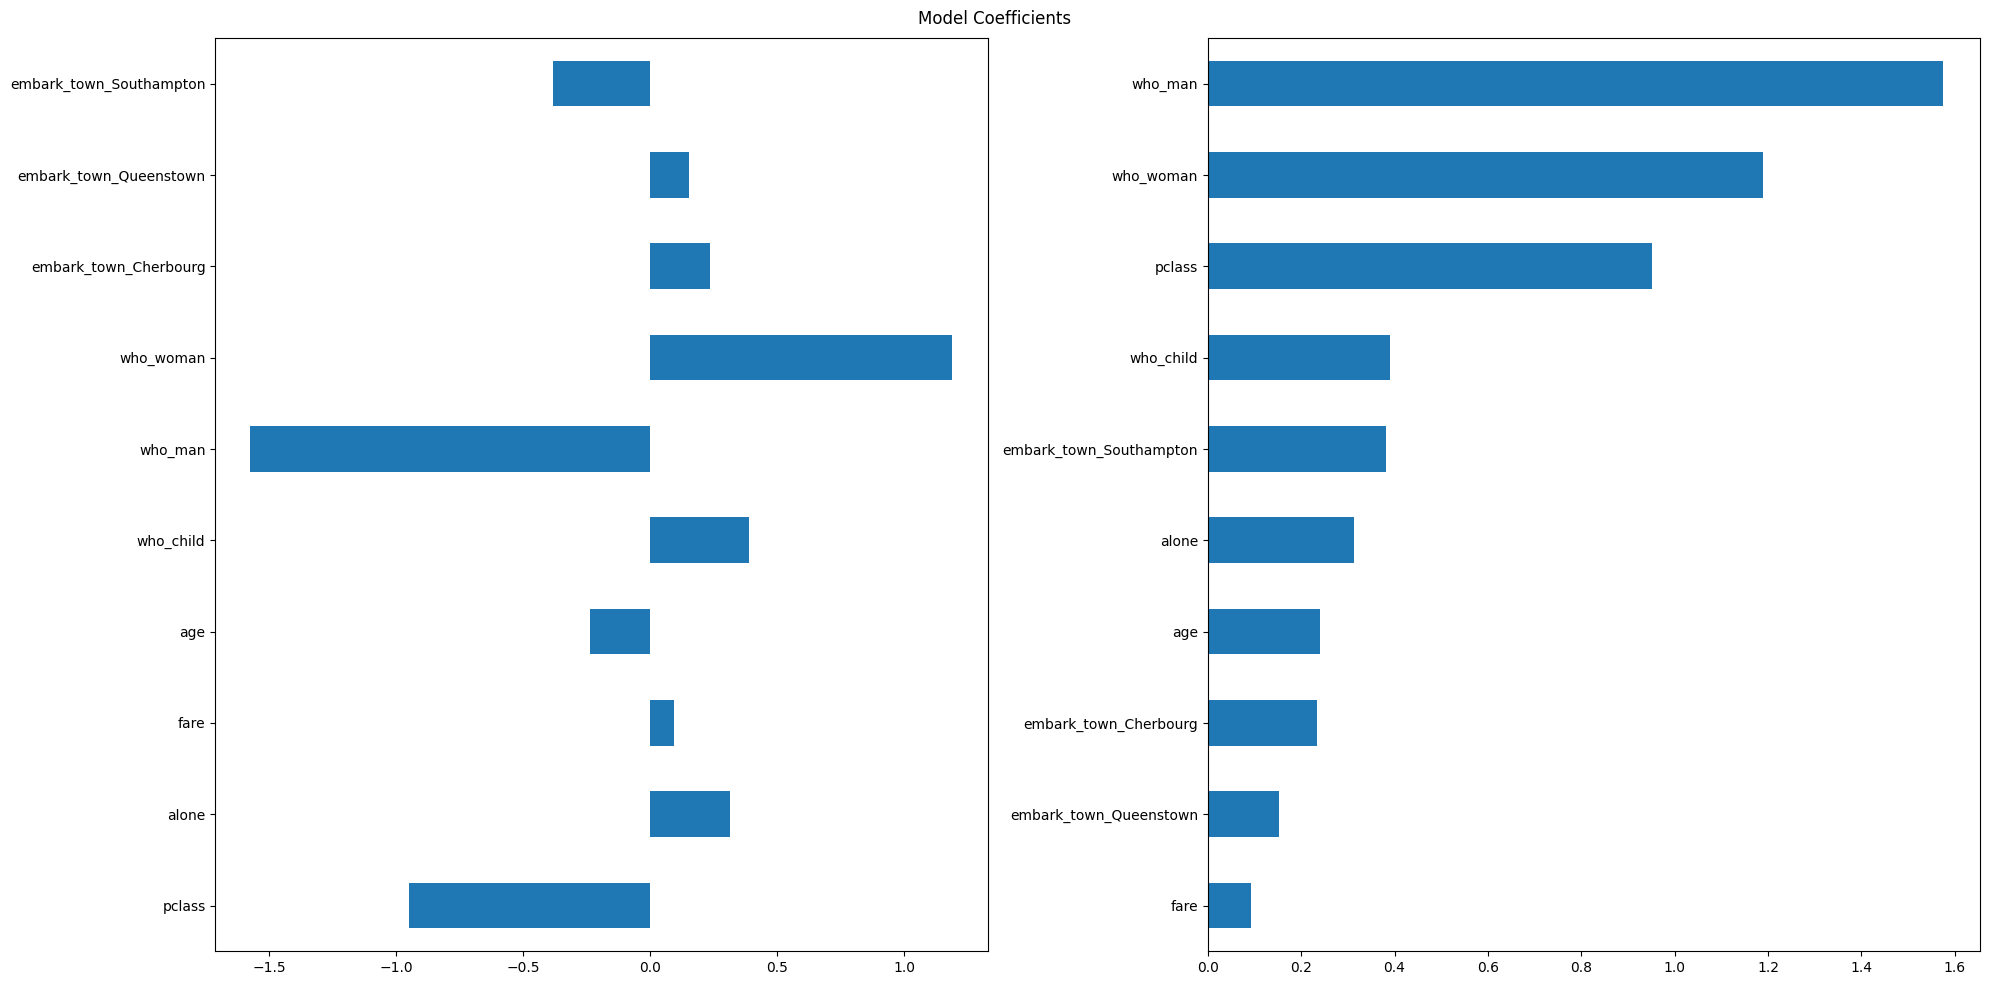

In [935]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
coeficientes.plot(kind="barh", ax=axs[0], legend=False)
coeficientes.abs().sort_values(by="coeficientes").plot(kind="barh", ax=axs[1], legend=False)
fig.suptitle("Model Coefficients")

fig.tight_layout()

In [941]:
c_matrix = confusion_matrix(y_train, pred_train)
c_matrix_df = pd.DataFrame(c_matrix, columns=[f"Pred_{col}" for col in train.survived.value_counts().sort_index().index], index=[f"True_{col}" for col in train.survived.value_counts().sort_index().index])
c_matrix_df

,Pred_0,Pred_1
True_0,385,61
True_1,79,187


In [ ]:
# Función para agilizar
def metrics_titanic(model, X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

<Axes: >

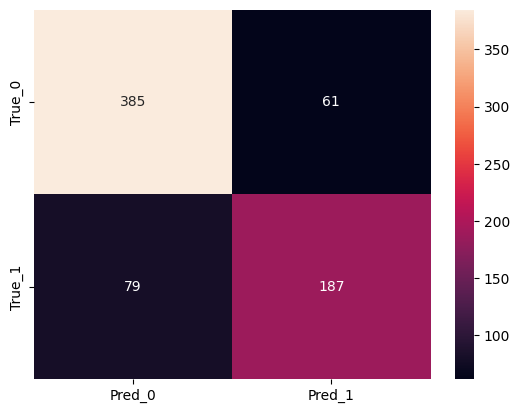

In [942]:
sns.heatmap(c_matrix_df, annot=True, fmt = "g")

<Axes: >

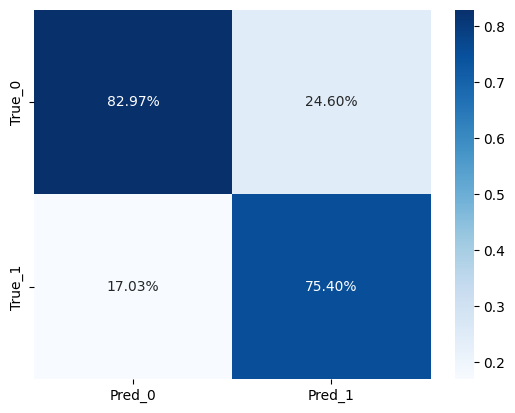

In [943]:
sns.heatmap(c_matrix_df/np.sum(c_matrix_df, axis = 0), annot=True, fmt = ".2%", cmap= "Blues")

In [944]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       446
           1       0.75      0.70      0.73       266

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



In [945]:
metrics.accuracy_score(y_train, pred_train)

0.8033707865168539

In [946]:
scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")
scores.mean()

np.float64(0.7837978922485964)

In [947]:
pred_test = log_reg.predict(X_test)

metrics.accuracy_score(y_test, pred_test)

0.8156424581005587

In [948]:
c_matrix = confusion_matrix(y_test, pred_test)
c_matrix_df = pd.DataFrame(c_matrix, columns=[f"Pred_{i}" for i in train.survived.unique()], index = [f"True_{i}" for i in train.survived.unique()])
c_matrix_df

,Pred_1,Pred_0
True_1,85,18
True_0,15,61


<Axes: >

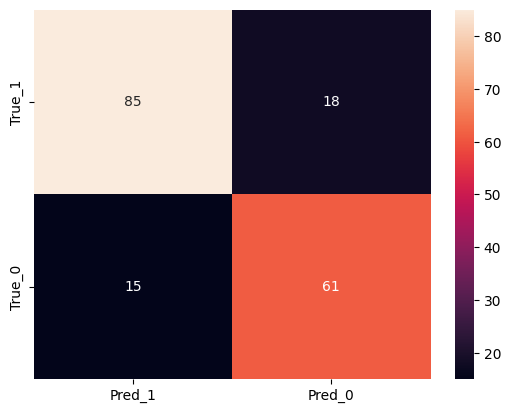

In [949]:
sns.heatmap(c_matrix_df, annot=True, fmt="g")

<Axes: >

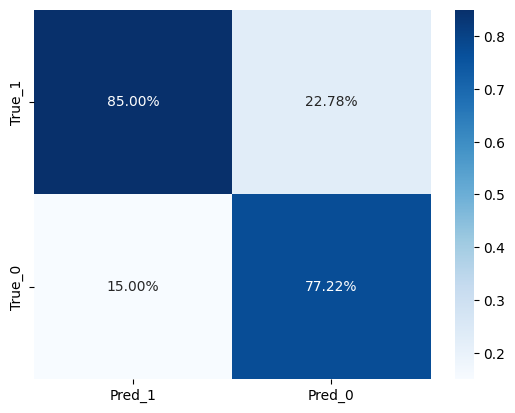

In [950]:
sns.heatmap(c_matrix_df/np.sum(c_matrix_df, axis=0), annot=True, fmt=".2%", cmap="Blues")

In [951]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       103
           1       0.77      0.80      0.79        76

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [708]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [709]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [710]:
df_titanic.drop(columns=["embarked", "class", "deck", "alive"], inplace=True)
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,True


<Axes: xlabel='survived', ylabel='count'>

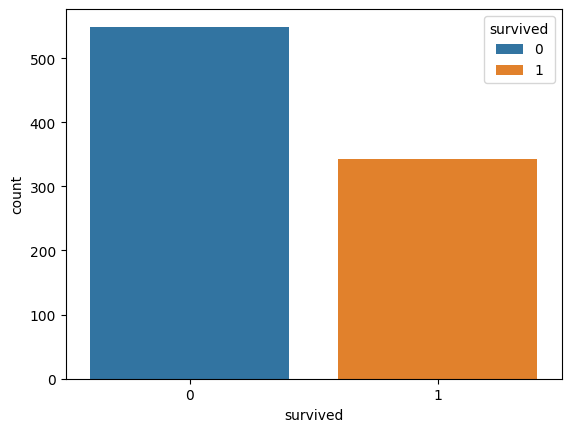

In [711]:
sns.countplot(df_titanic, x = "survived", hue = "survived")


*Nuestra variable target está un poco desbalanceada, pero no en exceso, por lo que no debería dar demasiado problema.*

In [712]:
df_titanic.loc[df_titanic.embark_town.isna(), "embark_town"] =  df_titanic.embark_town.mode()[0]

train, test = train_test_split(df_titanic, test_size= 0.2, stratify= df_titanic["embark_town"], random_state= 42)


In [713]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 838 to 571
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          561 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   who          712 non-null    object 
 8   adult_male   712 non-null    bool   
 9   embark_town  712 non-null    object 
 10  alone        712 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 57.0+ KB


In [714]:
es_nino = train["who"] == "child"
es_hombre = train["who"] == "man"
es_mujer = train["who"] == "woman"
edad_nulo = train["age"].isna()

media_hombre = train.loc[es_hombre, "age"].mean()
media_mujer = train.loc[es_mujer, "age"].mean()
media_nino = train.loc[es_nino, "age"].mean()

train.loc[es_hombre & edad_nulo, "age"] = media_hombre
train.loc[es_mujer & edad_nulo, "age"] = media_mujer
train.loc[es_nino & edad_nulo, "age"] = media_nino

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 838 to 571
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   who          712 non-null    object 
 8   adult_male   712 non-null    bool   
 9   embark_town  712 non-null    object 
 10  alone        712 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 57.0+ KB


In [715]:
es_nino = test["who"] == "child"
es_hombre = test["who"] == "man"
es_mujer = test["who"] == "woman"
edad_nulo = test["age"].isna()

test.loc[es_hombre & edad_nulo, "age"] = media_hombre
test.loc[es_mujer & edad_nulo, "age"] = media_mujer
test.loc[es_nino & edad_nulo, "age"] = media_nino

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 395 to 9
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     179 non-null    int64  
 1   pclass       179 non-null    int64  
 2   sex          179 non-null    object 
 3   age          179 non-null    float64
 4   sibsp        179 non-null    int64  
 5   parch        179 non-null    int64  
 6   fare         179 non-null    float64
 7   who          179 non-null    object 
 8   adult_male   179 non-null    bool   
 9   embark_town  179 non-null    object 
 10  alone        179 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 14.3+ KB


In [716]:
train.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.321097,-0.068907,-0.019424,0.075400,0.263719,-0.549396,-0.206772
pclass,-0.321097,1.000000,-0.329964,0.078641,-0.000447,-0.533078,0.103539,0.136922
age,-0.068907,-0.329964,1.000000,-0.235170,-0.199282,0.081429,0.274482,0.191392
sibsp,-0.019424,0.078641,-0.235170,1.000000,0.458566,0.162751,-0.265474,-0.593969
parch,0.075400,-0.000447,-0.199282,0.458566,1.000000,0.233931,-0.332198,-0.604069
fare,0.263719,-0.533078,0.081429,0.162751,0.233931,1.000000,-0.189753,-0.260775
adult_male,-0.549396,0.103539,0.274482,-0.265474,-0.332198,-0.189753,1.000000,0.420266
alone,-0.206772,0.136922,0.191392,-0.593969,-0.604069,-0.260775,0.420266,1.000000


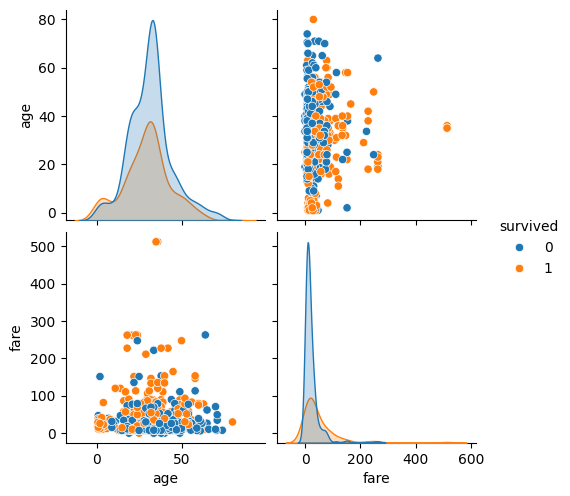

In [717]:
sns.pairplot(train[["age", "fare", "survived"]], hue= "survived")

*Como tengo pocas numéricas y en ambas se observa al menos algo de correlación, de momento me quedo las dos, si tengo tiempo probaré a quitar "age" que parece menos relacionada.*

In [718]:
f_num = ["fare", "age"]

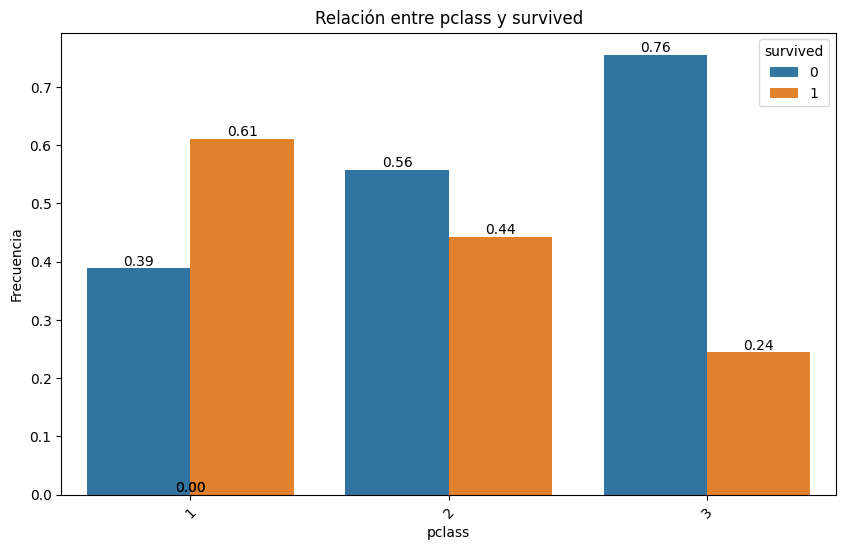

In [719]:
bootcampviztools.plot_categorical_relationship_fin(train, "pclass", "survived", relative_freq=True, show_values=True)

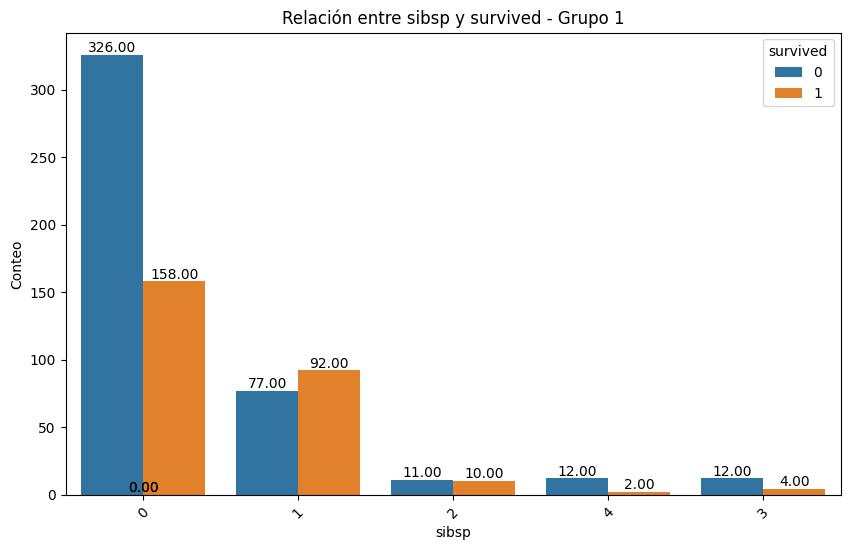

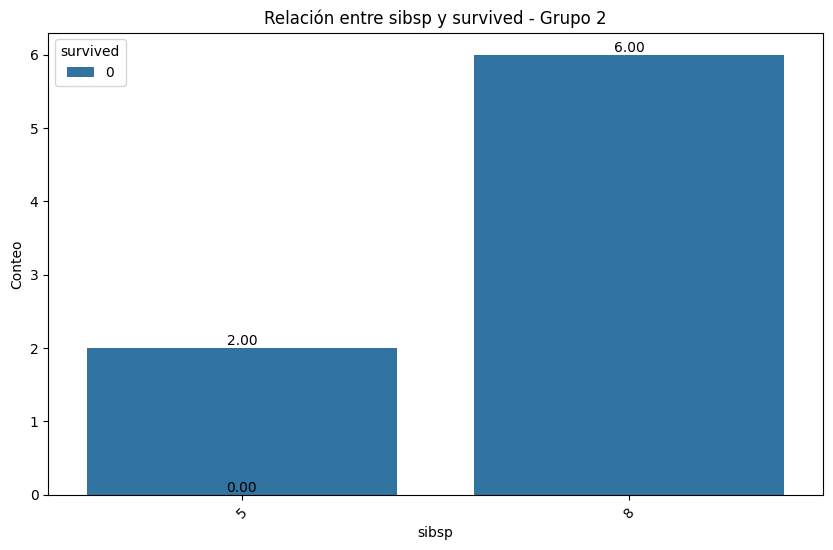

In [720]:
bootcampviztools.plot_categorical_relationship_fin(train, "sibsp", "survived", show_values=True)

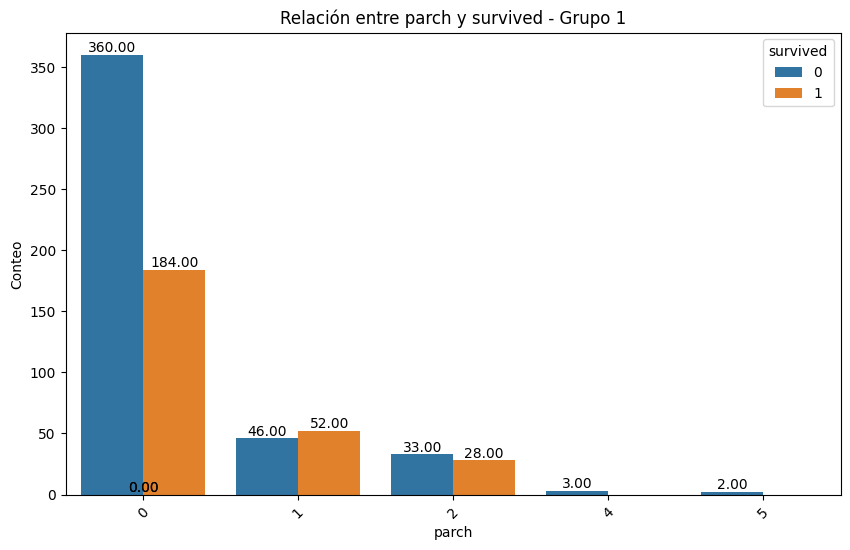

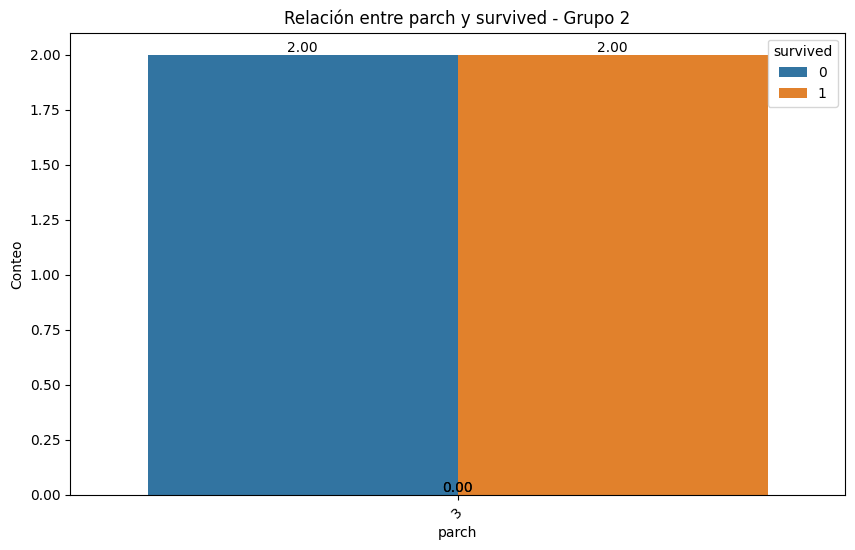

In [721]:
bootcampviztools.plot_categorical_relationship_fin(train, "parch", "survived", show_values=True)

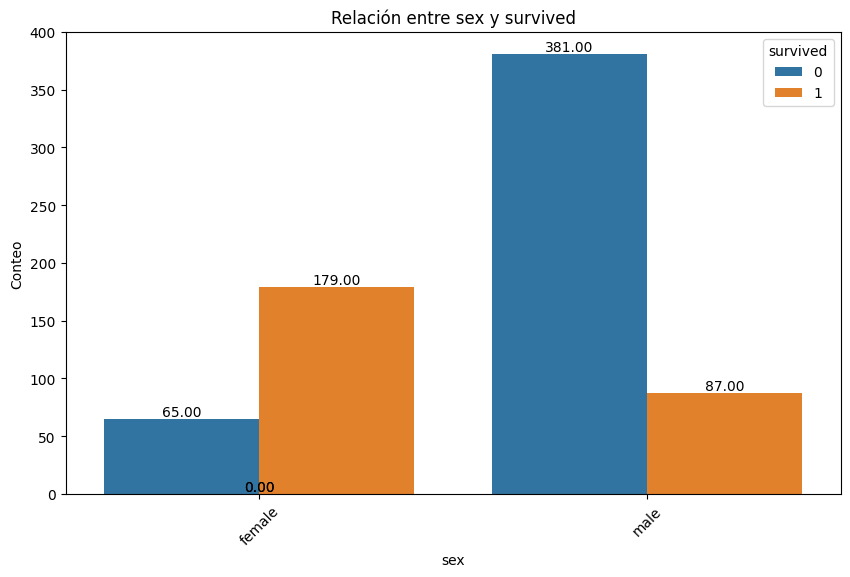

In [722]:
bootcampviztools.plot_categorical_relationship_fin(train, "sex", "survived", show_values=True)

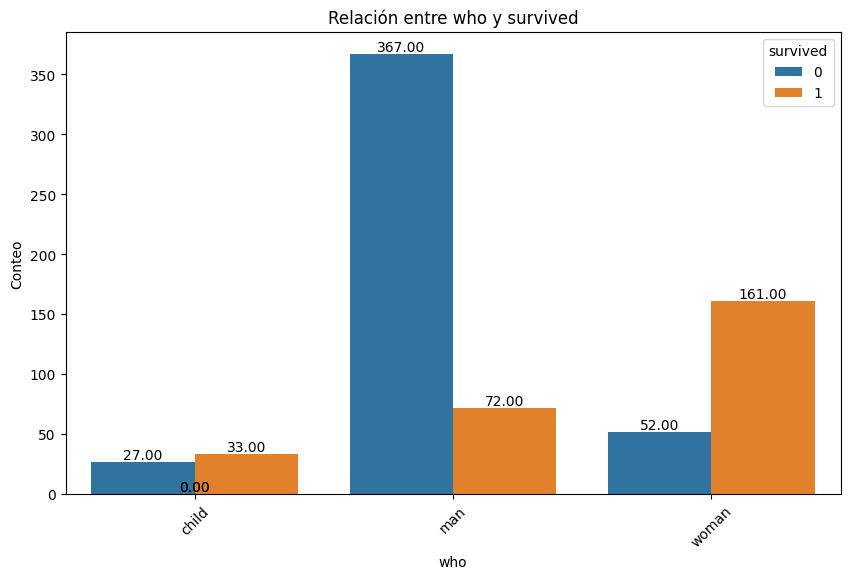

In [723]:
bootcampviztools.plot_categorical_relationship_fin(train, "who", "survived", show_values=True)

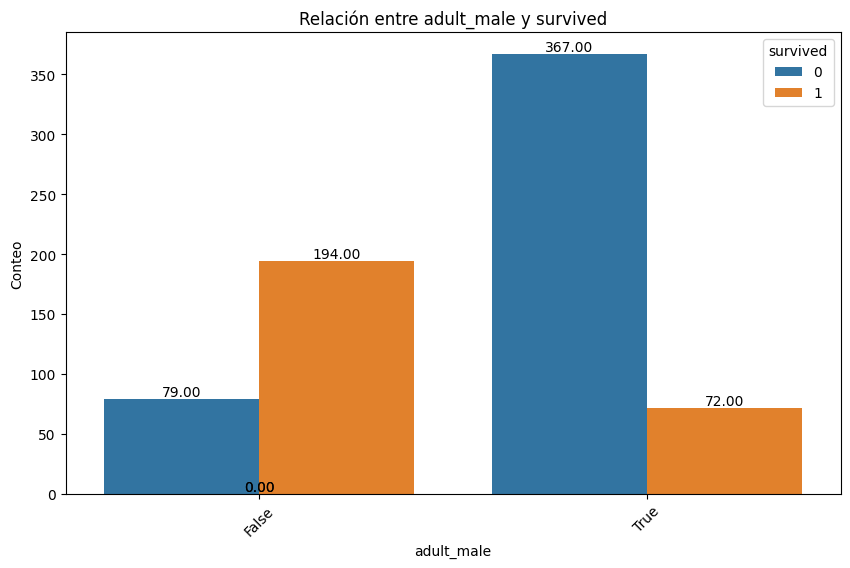

In [724]:
bootcampviztools.plot_categorical_relationship_fin(train, "adult_male", "survived", show_values=True)

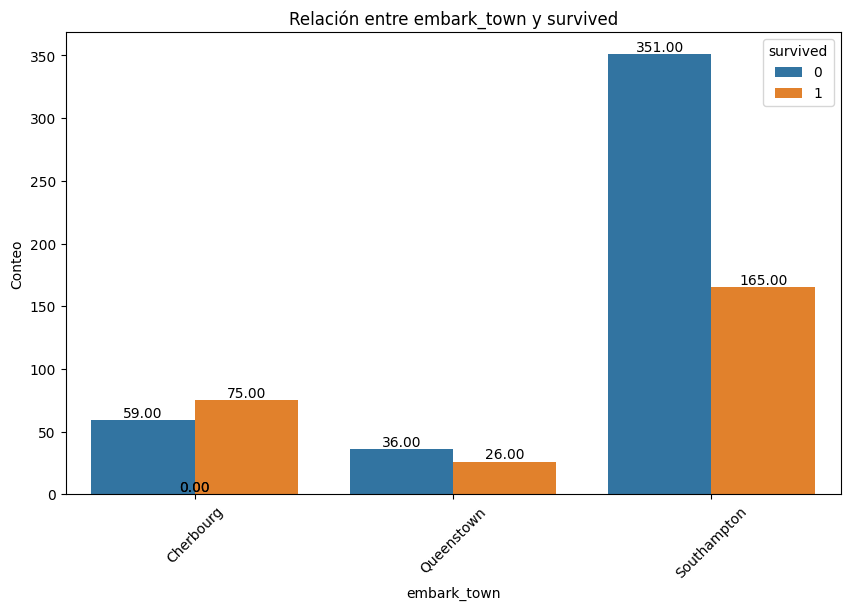

In [725]:
bootcampviztools.plot_categorical_relationship_fin(train, "embark_town", "survived", show_values=True)

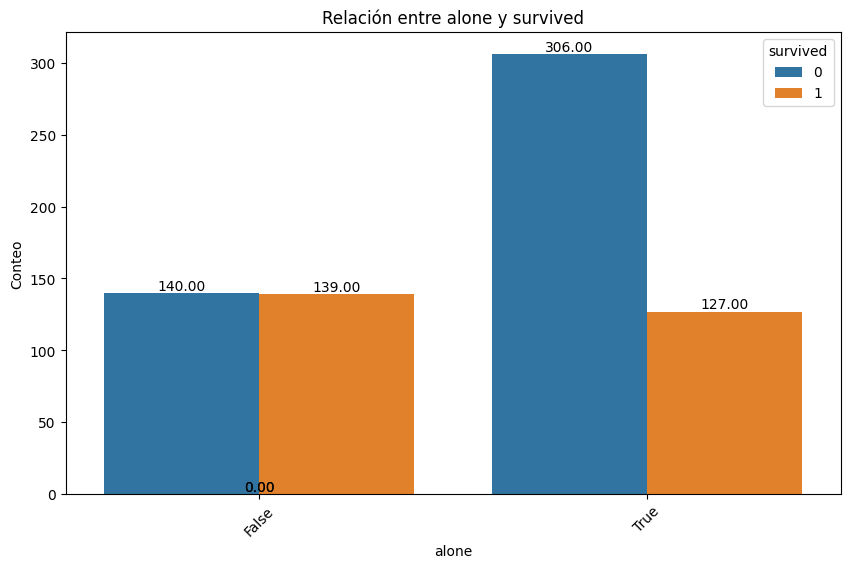

In [726]:
bootcampviztools.plot_categorical_relationship_fin(train, "alone", "survived", show_values=True)

In [727]:
from scipy.stats import chi2_contingency
for col in train.drop(columns=["age", "fare", "survived"]):
    tabla_contingecia = pd.crosstab(train["survived"], train[col])
    chi2, p_value, dof, expected = chi2_contingency(tabla_contingecia)
    print(f"P-Value para descartar que '{col}' y 'survive' no están relacionadas: {p_value}")

P-Value para descartar que 'pclass' y 'survive' no están relacionadas: 1.08811242411783e-16
P-Value para descartar que 'sex' y 'survive' no están relacionadas: 4.069774816014647e-46
P-Value para descartar que 'sibsp' y 'survive' no están relacionadas: 3.287911675473301e-06
P-Value para descartar que 'parch' y 'survive' no están relacionadas: 0.0024974969023396445
P-Value para descartar que 'who' y 'survive' no están relacionadas: 3.1078986957052767e-49
P-Value para descartar que 'adult_male' y 'survive' no están relacionadas: 3.76197457979106e-48
P-Value para descartar que 'embark_town' y 'survive' no están relacionadas: 1.5337936276875425e-06
P-Value para descartar que 'alone' y 'survive' no están relacionadas: 5.3879237397336957e-08


*En todas podemos descartar la hipótesis nula (que no están relacionadas), por lo que a priori podemos afirmar con cierta confianza estadística que todas están relacionadas con la variable target, vamos a ver ahora entre ellas.*

In [728]:
dict_chi2 = {}
for col in train.drop(columns=["age", "fare", "survived"]):
    dict_chi2[col] = []
    for col2 in train.drop(columns=["age", "fare", "survived"]):
        tabla_contingecia = pd.crosstab(train[col], train[col2])
        chi2, p_value, dof, expected = chi2_contingency(tabla_contingecia)
        dict_chi2[col].append(p_value)

tabla_chi2 = pd.DataFrame(dict_chi2, index = train.drop(columns=["age", "fare", "survived"]).columns.to_list())

In [729]:
tabla_chi2

,pclass,sex,sibsp,parch,who,adult_male,embark_town,alone
pclass,4.319350e-307,9.017604e-04,7.214211e-05,6.316902e-01,1.472300e-06,1.168067e-02,2.889233e-19,1.197059e-03
sex,9.017604e-04,6.762539e-156,5.143035e-08,5.994285e-09,6.841489e-141,5.655005e-131,2.934654e-05,1.180646e-17
sibsp,7.214211e-05,5.143035e-08,0.000000e+00,4.499024e-44,3.386919e-46,1.298934e-18,2.241188e-02,3.159165e-109
parch,6.316902e-01,5.994285e-09,4.499024e-44,0.000000e+00,2.956082e-41,5.845564e-22,7.437331e-02,1.338153e-71
who,1.472300e-06,6.841489e-141,3.386919e-46,2.956082e-41,4.319350e-307,2.461299e-155,1.829198e-04,5.683982e-35
adult_male,1.168067e-02,5.655005e-131,1.298934e-18,5.845564e-22,2.461299e-155,6.091127e-156,8.149138e-04,8.459124e-29
embark_town,2.889233e-19,2.934654e-05,2.241188e-02,7.437331e-02,1.829198e-04,8.149138e-04,4.319350e-307,6.156408e-04
alone,1.197059e-03,1.180646e-17,3.159165e-109,1.338153e-71,5.683982e-35,8.459124e-29,6.156408e-04,5.989768e-156


*Parece que todas están bastante relacionadas entre sí con bastante confianza estadística, así que voy a descartar algunas de las columnas que son muy similares. En el caso de "who", "sex" y "adult_male" voy a quedarme con who, porque diferencia entre mujeres y niños y además tiene el menor p-value en la prueba chi^2, aunque si tengo tiempo probaré las 3. En el caso de "alone", "sibsp" y "parch" de momento me voy a quedar con "alone" porque tiene un menor p-value en la prueba chi^2, aunque si tengo tiempo probaré con las otras dos juntas.* 

In [730]:
f_cat = train.drop(columns=["age", "fare", "survived", "who", "adult_male", "alone"]).columns.to_list()
features = f_cat+f_num
target = "survived"

In [731]:
train = train.copy().drop(columns=["who", "adult_male", "alone"])
test = test.copy().drop(columns=["who", "adult_male", "alone"])

In [732]:
train[f_cat]

,pclass,sex,sibsp,parch,embark_town
838,3,male,0,0,Southampton
621,1,male,1,0,Southampton
282,3,male,0,0,Southampton
275,1,female,1,0,Southampton
217,2,male,1,0,Southampton
...,...,...,...,...,...
594,2,male,1,0,Southampton
166,1,female,0,1,Southampton
121,3,male,0,0,Southampton
785,3,male,0,0,Southampton


In [733]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 838 to 571
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   embark_town  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [734]:
for col in train[f_cat]:
    if train[col].dtype == "object":
        train = pd.get_dummies(train, columns= [col], dtype= int)
        test = pd.get_dummies(test, columns= [col], dtype= int)

array([[<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

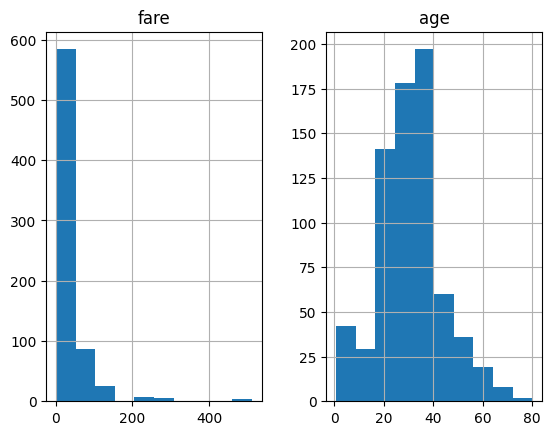

In [735]:
train[f_num].hist()

In [736]:
train_bck = train.copy()

In [737]:
feature_log = train.fare + 1
train.fare = np.log(feature_log)
feature_log = test.fare + 1
test.fare = np.log(feature_log)

In [738]:
scaler = StandardScaler()

for col in train[f_num]:
    scaler.fit(train[[col]])
    train[col] = scaler.transform(train[[col]])
    test[col] = scaler.transform(test[[col]])

In [739]:
X_train = train.drop(columns=["survived"])
y_train = train["survived"]
X_test = test.drop(columns=["survived"])
y_test = test["survived"]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(712, 10) (712,) (179, 10) (179,)


In [740]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [741]:
pred_train = log_reg.predict(X_train)

In [742]:
log_reg.predict_proba(X_train)

array([[0.81123755, 0.18876245],
       [0.67765972, 0.32234028],
       [0.83725421, 0.16274579],
       ...,
       [0.90783204, 0.09216796],
       [0.88475957, 0.11524043],
       [0.27144562, 0.72855438]], shape=(712, 2))

In [743]:
coeficientes = pd.DataFrame(log_reg.coef_.tolist(), index= ["coeficientes"], columns= log_reg.feature_names_in_).T
coeficientes.abs().sort_values(by="coeficientes", ascending=False)

,coeficientes
sex_female,1.247547
sex_male,1.246041
pclass,0.733136
age,0.436609
fare,0.408619
sibsp,0.388871
embark_town_Southampton,0.299871
embark_town_Queenstown,0.247593
parch,0.201751
embark_town_Cherbourg,0.053784


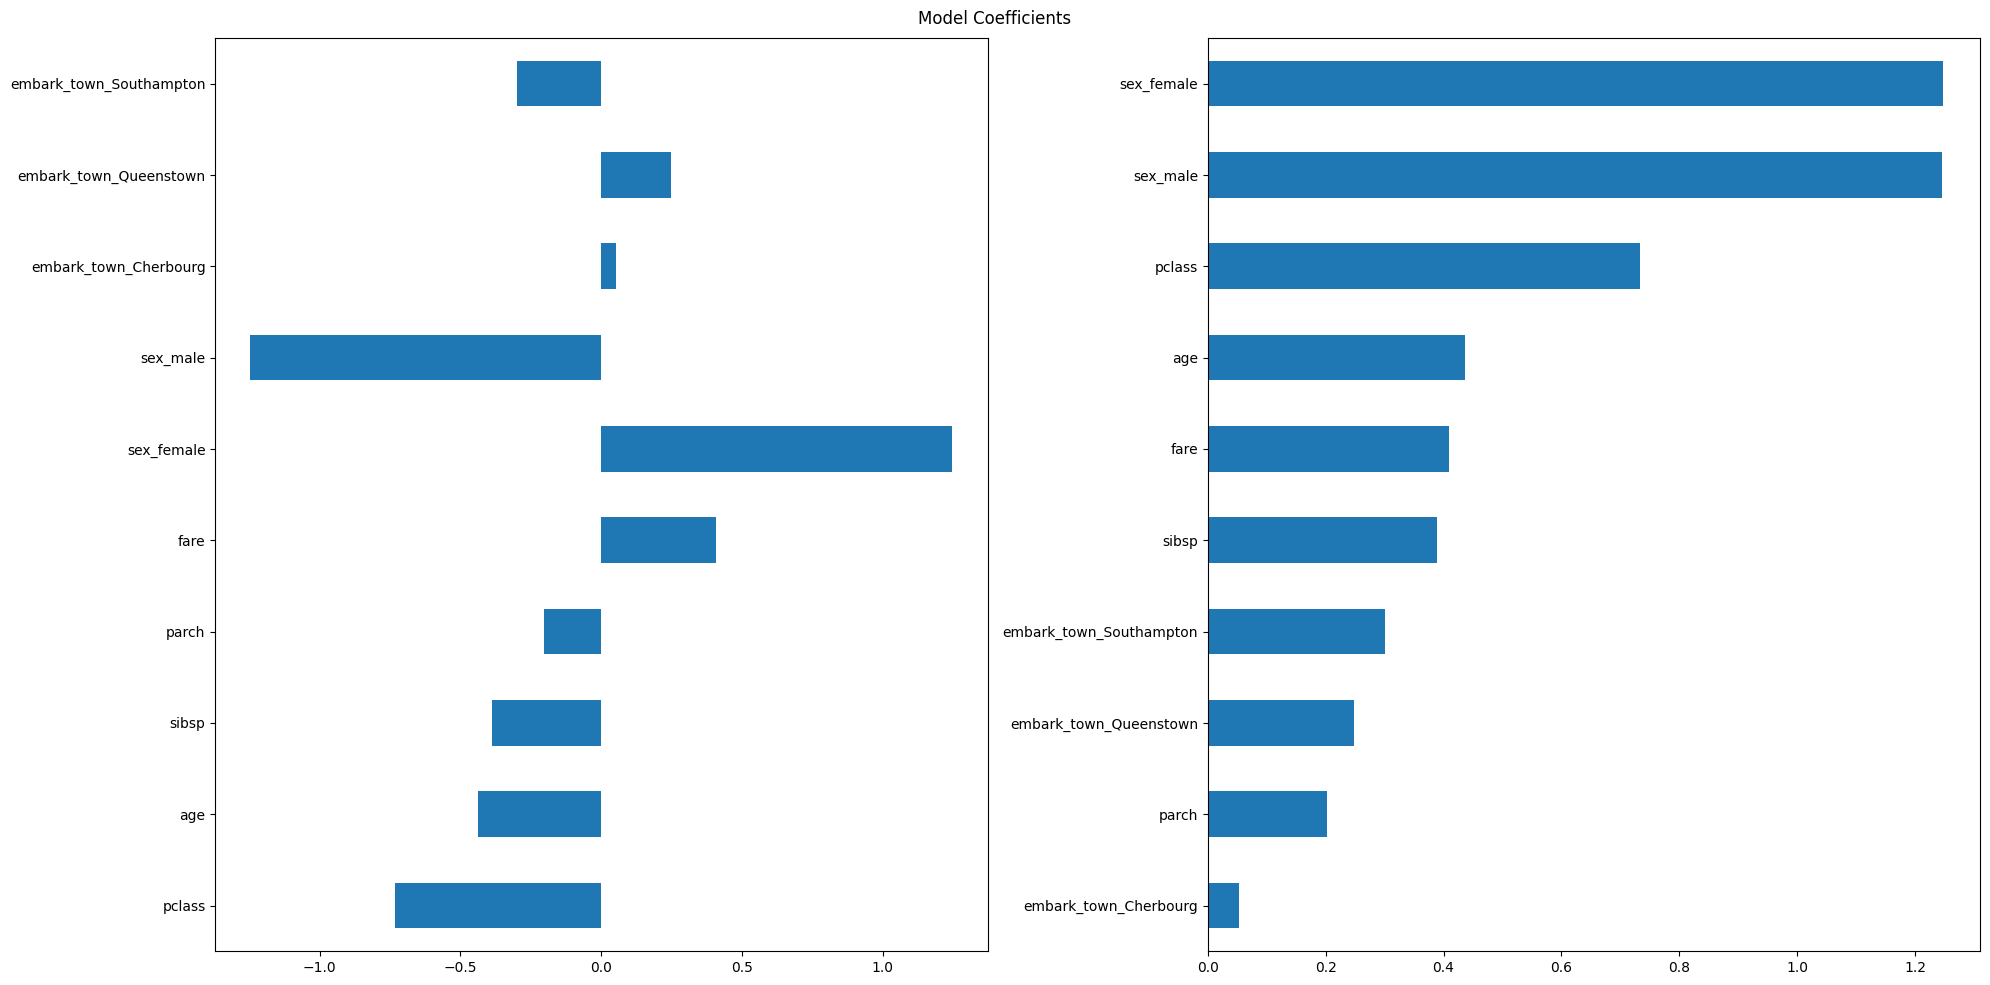

In [744]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
coeficientes.plot(kind="barh", ax=axs[0], legend=False)
coeficientes.abs().sort_values(by="coeficientes").plot(kind="barh", ax=axs[1], legend=False)
fig.suptitle("Model Coefficients")

fig.tight_layout()

In [745]:
c_matrix = confusion_matrix(y_train, pred_train)
c_matrix_df = pd.DataFrame(c_matrix, columns=[f"Pred_{col}" for col in train.survived.unique()], index=[f"True_{col}" for col in train.survived.unique()])
c_matrix_df

,Pred_1,Pred_0
True_1,383,63
True_0,87,179


<Axes: >

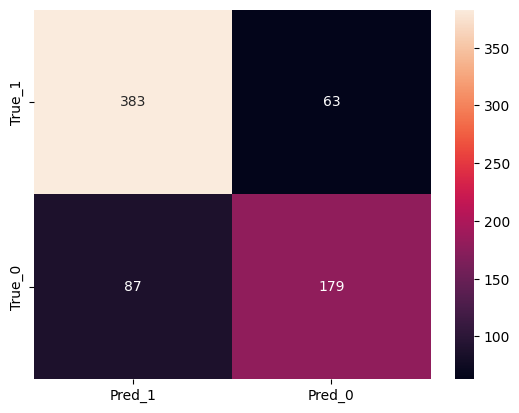

In [746]:
sns.heatmap(c_matrix_df, annot=True, fmt = "g")

<Axes: >

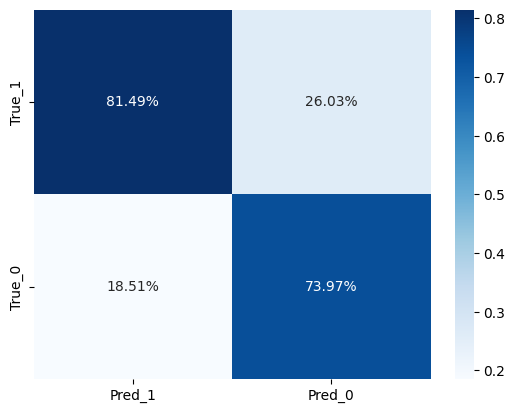

In [747]:
sns.heatmap(c_matrix_df/np.sum(c_matrix_df, axis = 0), annot=True, fmt = ".2%", cmap= "Blues")

In [748]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       446
           1       0.74      0.67      0.70       266

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712



In [749]:
metrics.accuracy_score(y_train, pred_train)

0.7893258426966292

In [750]:
scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")
scores.mean()

np.float64(0.7823697429331232)

In [751]:
pred_test = log_reg.predict(X_test)

metrics.accuracy_score(y_test, pred_test)

0.8435754189944135

In [752]:
c_matrix = confusion_matrix(y_test, pred_test)
c_matrix_df = pd.DataFrame(c_matrix, columns=[f"Pred_{i}" for i in train.survived.unique()], index = [f"True_{i}" for i in train.survived.unique()])
c_matrix_df

,Pred_1,Pred_0
True_1,90,13
True_0,15,61


<Axes: >

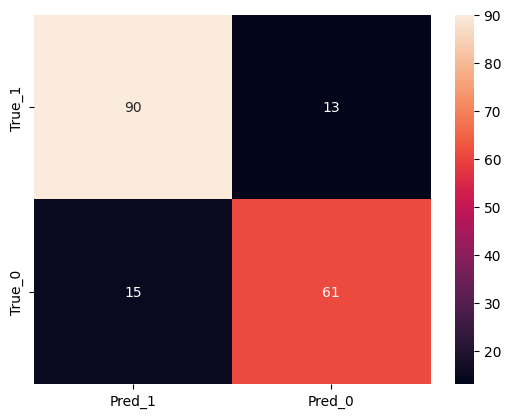

In [753]:
sns.heatmap(c_matrix_df, annot=True, fmt="g")

<Axes: >

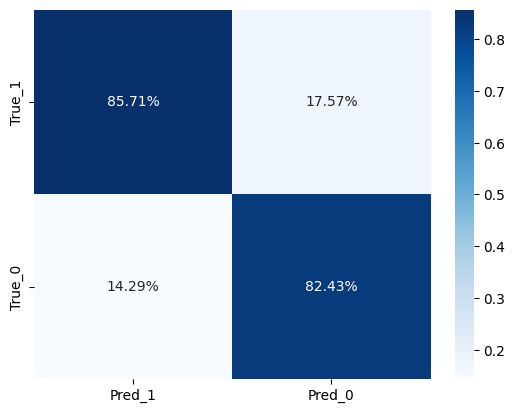

In [754]:
sns.heatmap(c_matrix_df/np.sum(c_matrix_df, axis=0), annot=True, fmt=".2%", cmap="Blues")

In [755]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       103
           1       0.82      0.80      0.81        76

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



In [772]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [773]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [774]:
df_titanic.drop(columns=["embarked", "class", "deck", "alive"], inplace=True)
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,True


<Axes: xlabel='pclass', ylabel='count'>

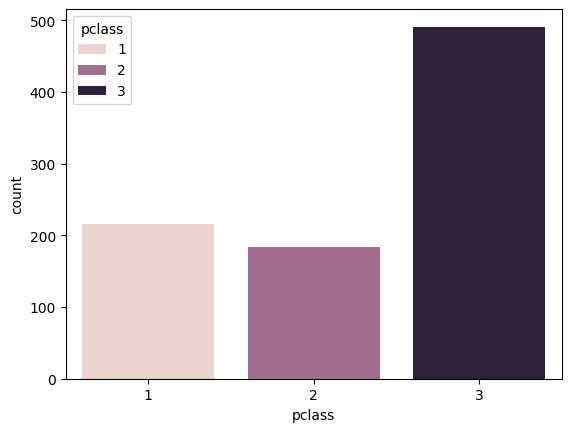

In [775]:
sns.countplot(df_titanic, x = "pclass", hue = "pclass")


*Nuestra variable target está un poco desbalanceada, pero no en exceso, por lo que no debería dar demasiado problema.*

In [776]:
df_titanic.loc[df_titanic.embark_town.isna(), "embark_town"] =  df_titanic.embark_town.mode()[0]

train, test = train_test_split(df_titanic, test_size= 0.2, stratify= df_titanic["embark_town"], random_state= 42)


In [777]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 838 to 571
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          561 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   who          712 non-null    object 
 8   adult_male   712 non-null    bool   
 9   embark_town  712 non-null    object 
 10  alone        712 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 57.0+ KB


In [778]:
es_nino = train["who"] == "child"
es_hombre = train["who"] == "man"
es_mujer = train["who"] == "woman"
edad_nulo = train["age"].isna()

media_hombre = train.loc[es_hombre, "age"].mean()
media_mujer = train.loc[es_mujer, "age"].mean()
media_nino = train.loc[es_nino, "age"].mean()

train.loc[es_hombre & edad_nulo, "age"] = media_hombre
train.loc[es_mujer & edad_nulo, "age"] = media_mujer
train.loc[es_nino & edad_nulo, "age"] = media_nino

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 838 to 571
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   who          712 non-null    object 
 8   adult_male   712 non-null    bool   
 9   embark_town  712 non-null    object 
 10  alone        712 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 57.0+ KB


In [779]:
es_nino = test["who"] == "child"
es_hombre = test["who"] == "man"
es_mujer = test["who"] == "woman"
edad_nulo = test["age"].isna()

test.loc[es_hombre & edad_nulo, "age"] = media_hombre
test.loc[es_mujer & edad_nulo, "age"] = media_mujer
test.loc[es_nino & edad_nulo, "age"] = media_nino

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 395 to 9
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     179 non-null    int64  
 1   pclass       179 non-null    int64  
 2   sex          179 non-null    object 
 3   age          179 non-null    float64
 4   sibsp        179 non-null    int64  
 5   parch        179 non-null    int64  
 6   fare         179 non-null    float64
 7   who          179 non-null    object 
 8   adult_male   179 non-null    bool   
 9   embark_town  179 non-null    object 
 10  alone        179 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 14.3+ KB


In [780]:
train.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.321097,-0.068907,-0.019424,0.075400,0.263719,-0.549396,-0.206772
pclass,-0.321097,1.000000,-0.329964,0.078641,-0.000447,-0.533078,0.103539,0.136922
age,-0.068907,-0.329964,1.000000,-0.235170,-0.199282,0.081429,0.274482,0.191392
sibsp,-0.019424,0.078641,-0.235170,1.000000,0.458566,0.162751,-0.265474,-0.593969
parch,0.075400,-0.000447,-0.199282,0.458566,1.000000,0.233931,-0.332198,-0.604069
fare,0.263719,-0.533078,0.081429,0.162751,0.233931,1.000000,-0.189753,-0.260775
adult_male,-0.549396,0.103539,0.274482,-0.265474,-0.332198,-0.189753,1.000000,0.420266
alone,-0.206772,0.136922,0.191392,-0.593969,-0.604069,-0.260775,0.420266,1.000000


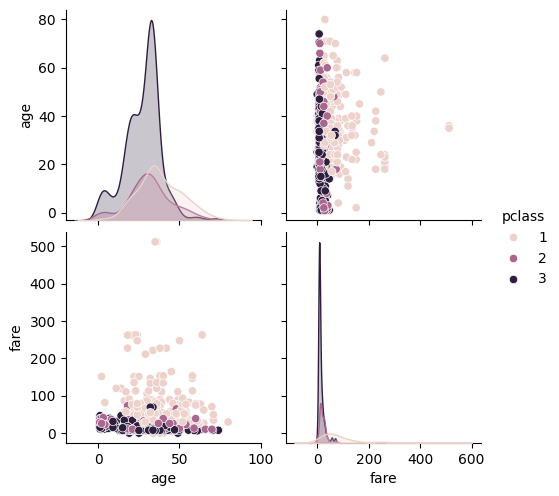

In [781]:
sns.pairplot(train[["age", "fare", "pclass"]], hue= "pclass")

*Como tengo pocas numéricas y en ambas se observa al menos algo de correlación, de momento me quedo las dos, si tengo tiempo probaré a quitar "age" que parece menos relacionada.*

In [782]:
f_num = ["fare", "age"]

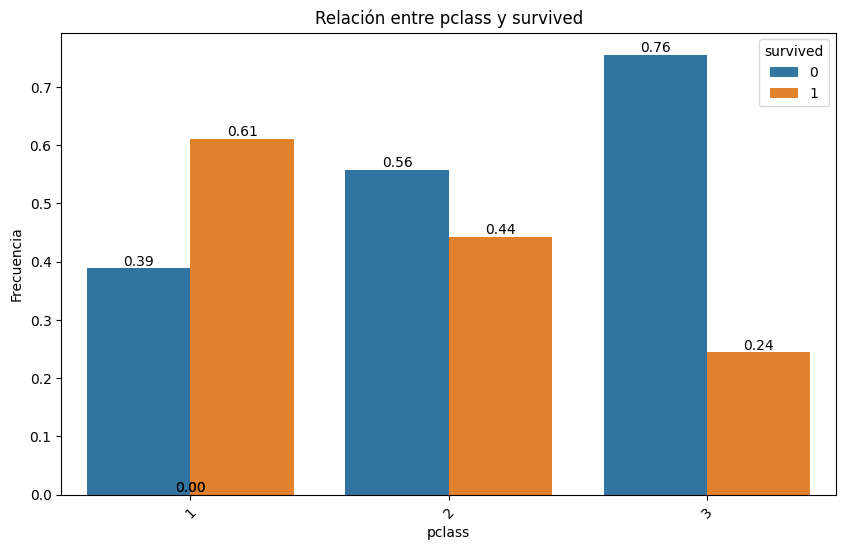

In [783]:
bootcampviztools.plot_categorical_relationship_fin(train, "pclass", "survived", relative_freq=True, show_values=True)

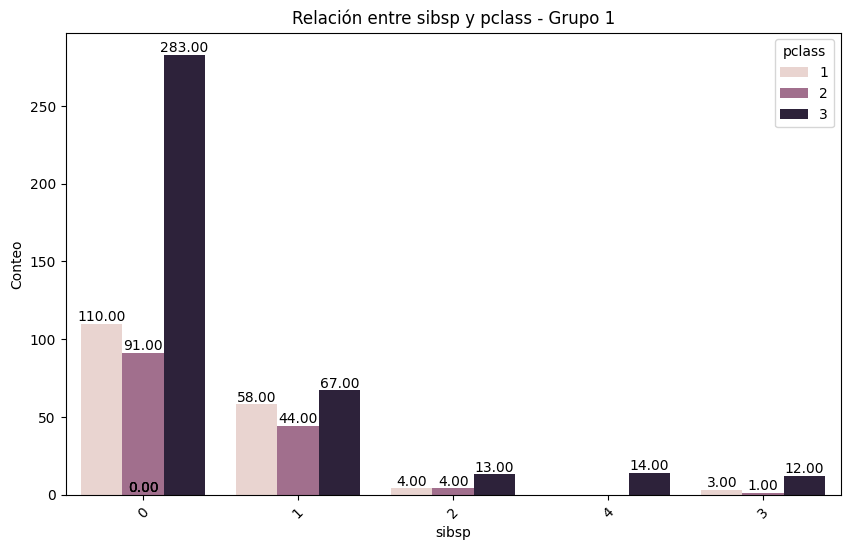

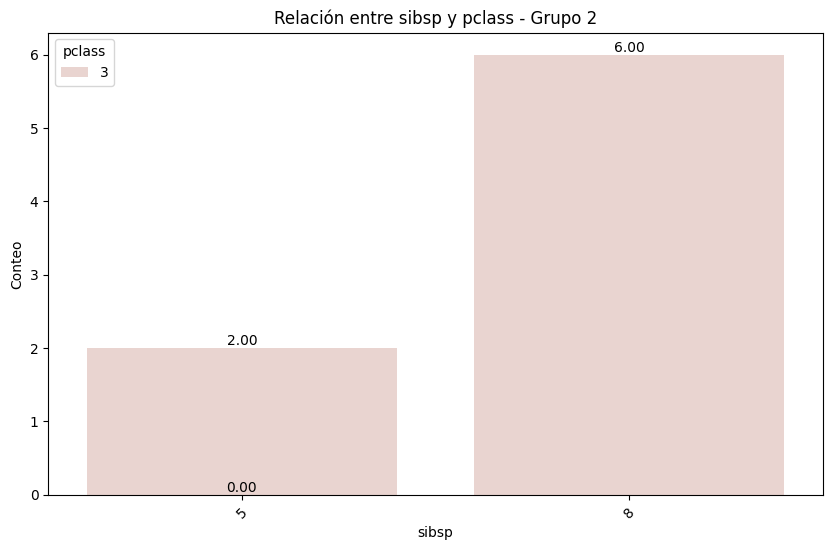

In [784]:
bootcampviztools.plot_categorical_relationship_fin(train, "sibsp", "pclass", show_values=True)

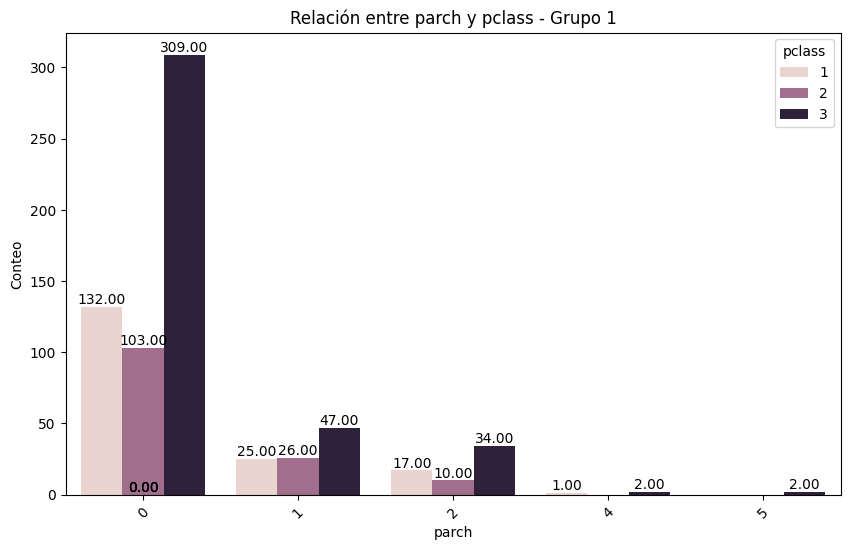

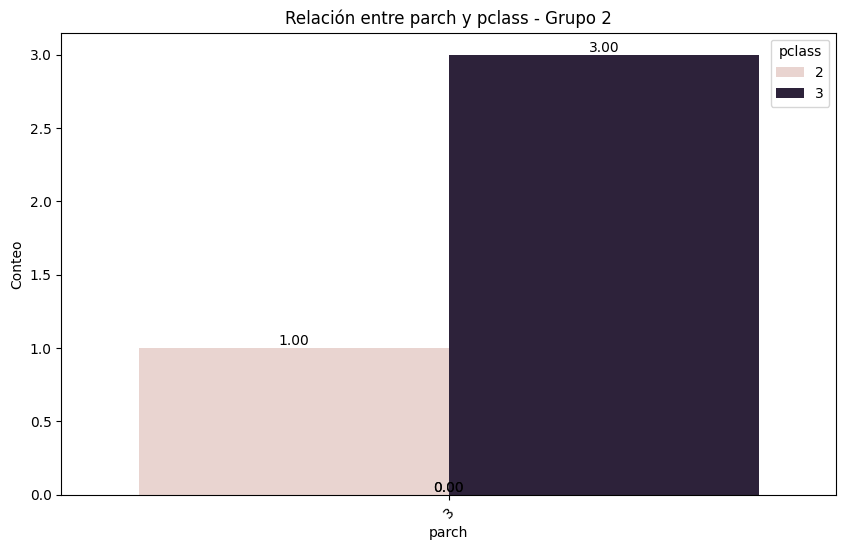

In [785]:
bootcampviztools.plot_categorical_relationship_fin(train, "parch", "pclass", show_values=True)

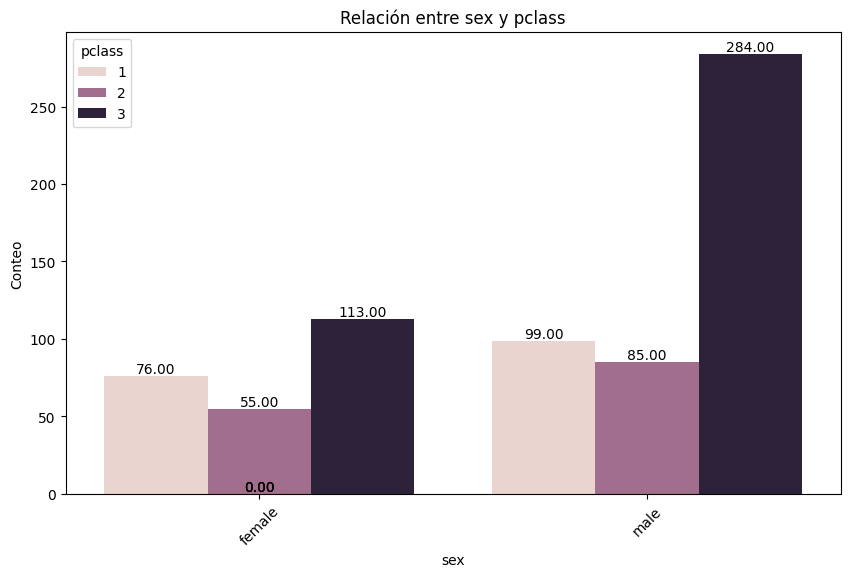

In [786]:
bootcampviztools.plot_categorical_relationship_fin(train, "sex", "pclass", show_values=True)

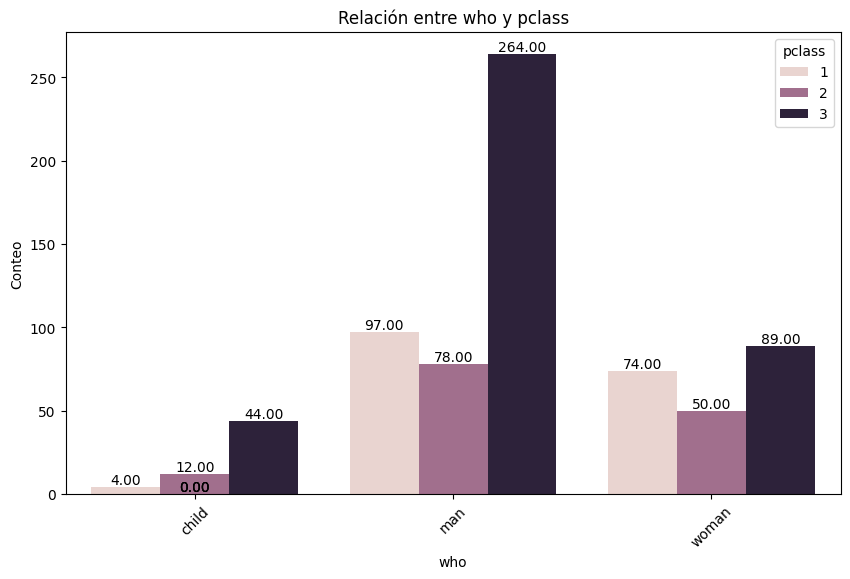

In [787]:
bootcampviztools.plot_categorical_relationship_fin(train, "who", "pclass", show_values=True)

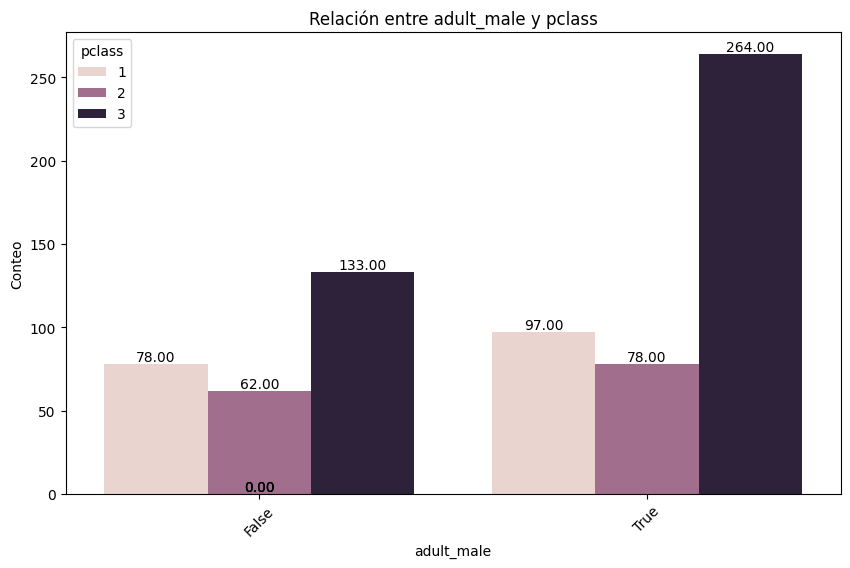

In [788]:
bootcampviztools.plot_categorical_relationship_fin(train, "adult_male", "pclass", show_values=True)

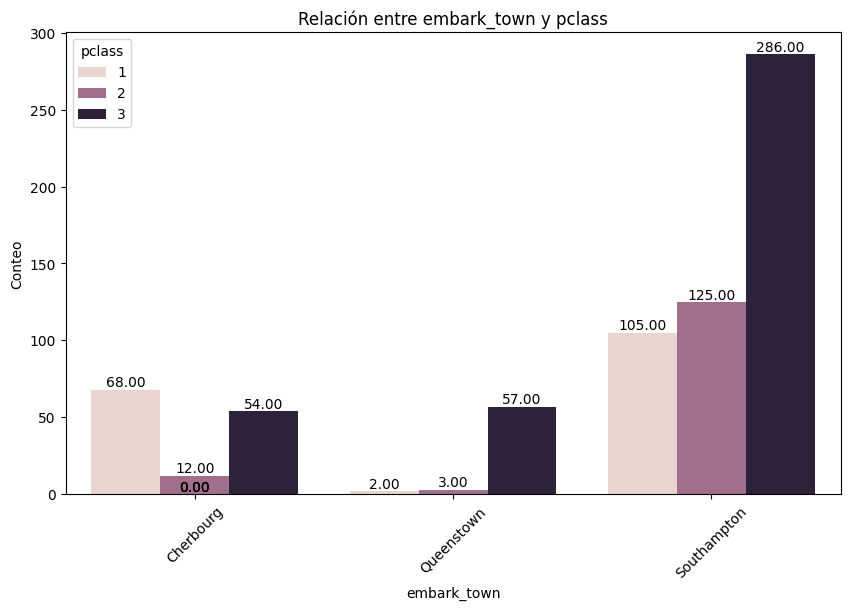

In [789]:
bootcampviztools.plot_categorical_relationship_fin(train, "embark_town", "pclass", show_values=True)

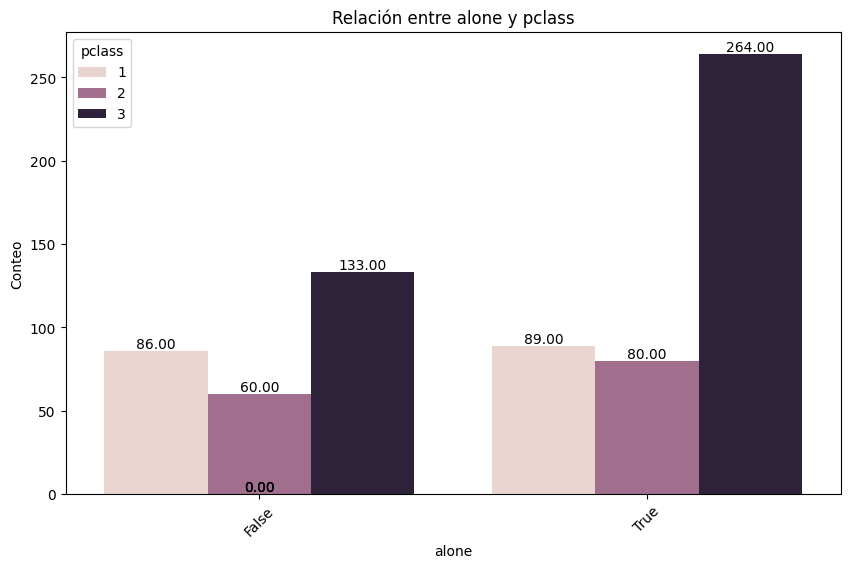

In [790]:
bootcampviztools.plot_categorical_relationship_fin(train, "alone", "pclass", show_values=True)

In [791]:
from scipy.stats import chi2_contingency
for col in train.drop(columns=["age", "fare", "pclass"]):
    tabla_contingecia = pd.crosstab(train["pclass"], train[col])
    chi2, p_value, dof, expected = chi2_contingency(tabla_contingecia)
    print(f"P-Value para descartar que '{col}' y 'survive' no están relacionadas: {p_value}")

P-Value para descartar que 'survived' y 'survive' no están relacionadas: 1.08811242411783e-16
P-Value para descartar que 'sex' y 'survive' no están relacionadas: 0.0009017603867012071
P-Value para descartar que 'sibsp' y 'survive' no están relacionadas: 7.214211231512189e-05
P-Value para descartar que 'parch' y 'survive' no están relacionadas: 0.6316901636622007
P-Value para descartar que 'who' y 'survive' no están relacionadas: 1.4723002690609592e-06
P-Value para descartar que 'adult_male' y 'survive' no están relacionadas: 0.011680668352752966
P-Value para descartar que 'embark_town' y 'survive' no están relacionadas: 2.8892326704800284e-19
P-Value para descartar que 'alone' y 'survive' no están relacionadas: 0.0011970591690852682


*En todas podemos descartar la hipótesis nula (que no están relacionadas), por lo que a priori podemos afirmar con cierta confianza estadística que todas están relacionadas con la variable target, vamos a ver ahora entre ellas.*

In [792]:
dict_chi2 = {}
for col in train.drop(columns=["age", "fare", "pclass"]):
    dict_chi2[col] = []
    for col2 in train.drop(columns=["age", "fare", "pclass"]):
        tabla_contingecia = pd.crosstab(train[col], train[col2])
        chi2, p_value, dof, expected = chi2_contingency(tabla_contingecia)
        dict_chi2[col].append(p_value)

tabla_chi2 = pd.DataFrame(dict_chi2, index = train.drop(columns=["age", "fare", "pclass"]).columns.to_list())

In [793]:
tabla_chi2

,survived,sex,sibsp,parch,who,adult_male,embark_town,alone
survived,6.223846e-156,4.069775e-46,3.287912e-06,2.497497e-03,3.107899e-49,3.761975e-48,1.533794e-06,5.387924e-08
sex,4.069775e-46,6.762539e-156,5.143035e-08,5.994285e-09,6.841489e-141,5.655005e-131,2.934654e-05,1.180646e-17
sibsp,3.287912e-06,5.143035e-08,0.000000e+00,4.499024e-44,3.386919e-46,1.298934e-18,2.241188e-02,3.159165e-109
parch,2.497497e-03,5.994285e-09,4.499024e-44,0.000000e+00,2.956082e-41,5.845564e-22,7.437331e-02,1.338153e-71
who,3.107899e-49,6.841489e-141,3.386919e-46,2.956082e-41,4.319350e-307,2.461299e-155,1.829198e-04,5.683982e-35
adult_male,3.761975e-48,5.655005e-131,1.298934e-18,5.845564e-22,2.461299e-155,6.091127e-156,8.149138e-04,8.459124e-29
embark_town,1.533794e-06,2.934654e-05,2.241188e-02,7.437331e-02,1.829198e-04,8.149138e-04,4.319350e-307,6.156408e-04
alone,5.387924e-08,1.180646e-17,3.159165e-109,1.338153e-71,5.683982e-35,8.459124e-29,6.156408e-04,5.989768e-156


*Parece que todas están bastante relacionadas entre sí con bastante confianza estadística, así que voy a descartar algunas de las columnas que son muy similares. En el caso de "who", "sex" y "adult_male" voy a quedarme con who, porque diferencia entre mujeres y niños y además tiene el menor p-value en la prueba chi^2, aunque si tengo tiempo probaré las 3. En el caso de "alone", "sibsp" y "parch" de momento me voy a quedar con "alone" porque tiene un menor p-value en la prueba chi^2, aunque si tengo tiempo probaré con las otras dos juntas.* 

In [794]:
f_cat = train.drop(columns=["age", "fare", "pclass", "who", "adult_male", "alone"]).columns.to_list()
features = f_cat+f_num
target = "pclass"

In [795]:
train = train.copy().drop(columns=["who", "adult_male", "alone"])
test = test.copy().drop(columns=["who", "adult_male", "alone"])

In [796]:
train[f_cat]

,survived,sex,sibsp,parch,embark_town
838,1,male,0,0,Southampton
621,1,male,1,0,Southampton
282,0,male,0,0,Southampton
275,1,female,1,0,Southampton
217,0,male,1,0,Southampton
...,...,...,...,...,...
594,0,male,1,0,Southampton
166,1,female,0,1,Southampton
121,0,male,0,0,Southampton
785,0,male,0,0,Southampton


In [797]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 838 to 571
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   embark_town  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [798]:
for col in train[f_cat]:
    if train[col].dtype == "object":
        train = pd.get_dummies(train, columns= [col], dtype= int)
        test = pd.get_dummies(test, columns= [col], dtype= int)

array([[<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

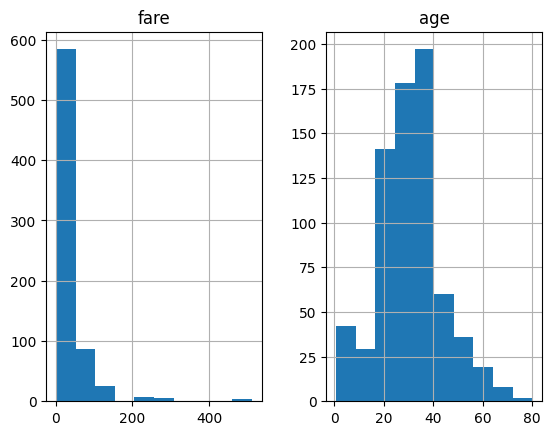

In [799]:
train[f_num].hist()

In [800]:
train_bck = train.copy()

In [801]:
feature_log = train.fare + 1
train.fare = np.log(feature_log)
feature_log = test.fare + 1
test.fare = np.log(feature_log)

In [802]:
scaler = StandardScaler()

for col in train[f_num]:
    scaler.fit(train[[col]])
    train[col] = scaler.transform(train[[col]])
    test[col] = scaler.transform(test[[col]])

In [803]:
X_train = train.drop(columns=["pclass"])
y_train = train["pclass"]
X_test = test.drop(columns=["pclass"])
y_test = test["pclass"]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(712, 10) (712,) (179, 10) (179,)


In [804]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [805]:
pred_train = log_reg.predict(X_train)

In [806]:
log_reg.predict_proba(X_train)

array([[0.88288029, 0.1037742 , 0.01334551],
       [0.82017408, 0.15309097, 0.02673495],
       [0.01007377, 0.16374202, 0.82618421],
       ...,
       [0.01932134, 0.21050031, 0.77017835],
       [0.00805708, 0.15568259, 0.83626033],
       [0.66003424, 0.29181649, 0.04814927]], shape=(712, 3))

In [810]:
coeficientes = pd.DataFrame(log_reg.coef_.tolist(), index= [f"coeficientes_{i}" for i in train.pclass.unique()], columns= log_reg.feature_names_in_).T
coeficientes.abs()

,coeficientes_3,coeficientes_1,coeficientes_2
survived,0.546149,0.160122,0.706271
age,0.496167,0.052994,0.443173
sibsp,0.648044,0.071014,0.577029
parch,0.441301,0.041060,0.400241
fare,1.927250,0.295789,1.631461
sex_female,0.143027,0.137527,0.005500
sex_male,0.140635,0.136081,0.004555
embark_town_Cherbourg,0.530051,0.196677,0.333374
embark_town_Queenstown,0.465322,0.354023,0.819345
embark_town_Southampton,0.067121,0.552146,0.485025


In [812]:
c_matrix = confusion_matrix(y_train, pred_train)
c_matrix

array([[167,   2,   6],
       [ 10,  40,  90],
       [  9,   6, 382]])

In [813]:
c_matrix = confusion_matrix(y_train, pred_train)
c_matrix_df = pd.DataFrame(c_matrix, columns=[f"Pred_{col}" for col in train.pclass.unique()], index=[f"True_{col}" for col in train.pclass.unique()])
c_matrix_df

,Pred_3,Pred_1,Pred_2
True_3,167,2,6
True_1,10,40,90
True_2,9,6,382


<Axes: >

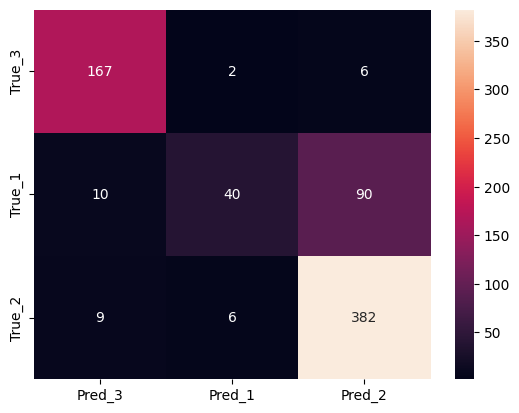

In [814]:
sns.heatmap(c_matrix_df, annot=True, fmt = "g")

<Axes: >

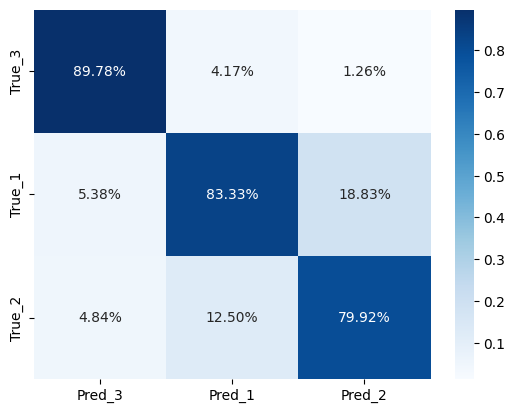

In [815]:
sns.heatmap(c_matrix_df/np.sum(c_matrix_df, axis = 0), annot=True, fmt = ".2%", cmap= "Blues")

In [816]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           1       0.90      0.95      0.93       175
           2       0.83      0.29      0.43       140
           3       0.80      0.96      0.87       397

    accuracy                           0.83       712
   macro avg       0.84      0.73      0.74       712
weighted avg       0.83      0.83      0.80       712



In [817]:
metrics.accuracy_score(y_train, pred_train)

0.827247191011236

In [818]:
scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")
scores.mean()

np.float64(0.8131980695360976)

In [819]:
pred_test = log_reg.predict(X_test)

metrics.accuracy_score(y_test, pred_test)

0.8212290502793296

In [844]:
c_matrix = confusion_matrix(y_test, pred_test)
c_matrix_df = pd.DataFrame(c_matrix, columns=[f"Pred_{i}" for i in train.pclass.value_counts().sort_index(ascending=True).index], index = [f"True_{i}" for i in train.pclass.value_counts().sort_index(ascending=True).index])
c_matrix_df

,Pred_1,Pred_2,Pred_3
True_1,40,1,0
True_2,4,14,26
True_3,0,1,93


<Axes: >

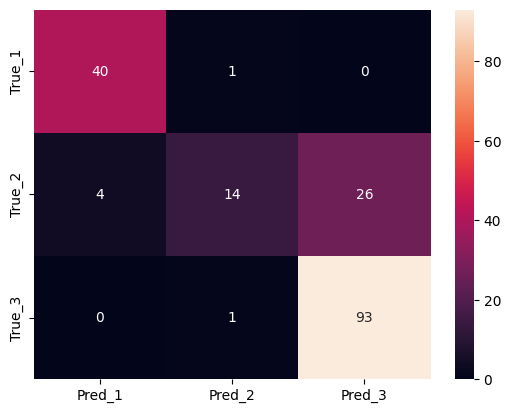

In [845]:
sns.heatmap(c_matrix_df, annot=True, fmt="g")

<Axes: >

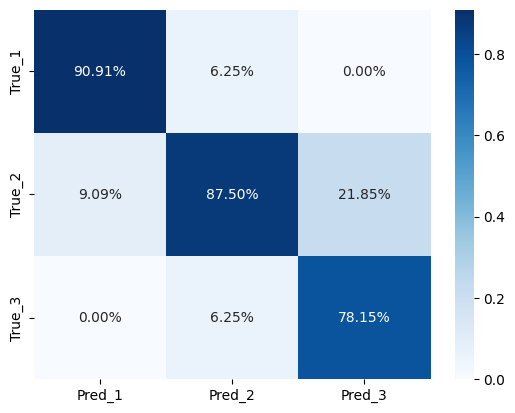

In [846]:
sns.heatmap(c_matrix_df/np.sum(c_matrix_df, axis=0), annot=True, fmt=".2%", cmap="Blues")

In [847]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           1       0.91      0.98      0.94        41
           2       0.88      0.32      0.47        44
           3       0.78      0.99      0.87        94

    accuracy                           0.82       179
   macro avg       0.86      0.76      0.76       179
weighted avg       0.83      0.82      0.79       179



*Para predecir la clase también da unos resultados bastante buenos, menos para el recall de la segunda clase, probablemente será porque hay menos registros o porque está menos relacionada con las features de mayor peso, es decir, podemos confiar bastante en el predictor para todo menos para que nos encuentre a casi todos los pasajeros de segunda clase.*